In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import prediction_error
from sklearn.model_selection import learning_curve

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("houses_Madrid.csv")


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [6]:
df['n_floors'].value_counts(dropna=False)

n_floors
NaN    20305
4.0      567
3.0      476
2.0      316
1.0       56
5.0       21
7.0        1
Name: count, dtype: int64

## Analyse exploratoire

In [7]:
df.describe()

id   sq_mt_built  sq_mt_useful       n_rooms   n_bathrooms  \
count  21742.000000  21616.000000   8228.000000  21742.000000  21726.000000   
mean   10871.500000    146.920892    103.458192      3.005749      2.091687   
std     6276.519112    134.181865     88.259192      1.510497      1.406992   
min        1.000000     13.000000      1.000000      0.000000      1.000000   
25%     5436.250000     70.000000     59.000000      2.000000      1.000000   
50%    10871.500000    100.000000     79.000000      3.000000      2.000000   
75%    16306.750000    162.000000    113.000000      4.000000      2.000000   
max    21742.000000    999.000000    998.000000     24.000000     16.000000   

          n_floors  sq_mt_allotment  latitude  longitude  portal  door  \
count  1437.000000      1432.000000       0.0        0.0     0.0   0.0   
mean      3.128740       241.692737       NaN        NaN     NaN   NaN   
std       0.907713       247.484853       NaN        NaN     NaN   NaN   
min       1.000000         1.000000       NaN        NaN     NaN   NaN   
25%       2.000000         2.000000       NaN        NaN     NaN   NaN   
50%       3.000000       232.000000       NaN        NaN     NaN   NaN   
75%       4.000000       354.000000       NaN        NaN     NaN   NaN   
max       7.000000       997.000000       NaN        NaN     NaN   NaN   

         rent_price  rent_price_by_area     buy_price  buy_price_by_area  \
count  2.174200e+04                 0.0  2.174200e+04       21742.000000   
mean  -5.917031e+04                 NaN  6.537356e+05        4020.523871   
std    9.171162e+05                 NaN  7.820821e+05        1908.418774   
min   -3.459028e+07                 NaN  3.600000e+04         447.000000   
25%    7.250000e+02                 NaN  1.980000e+05        2551.000000   
50%    1.116000e+03                 NaN  3.750000e+05        3720.000000   
75%    1.687000e+03                 NaN  7.636000e+05        5000.000000   
max    2.517000e+03                 NaN  8.800000e+06       18889.000000   

         built_year  are_pets_allowed  is_furnished  is_kitchen_equipped  \
count  10000.000000               0.0           0.0                  0.0   
mean    1970.046400               NaN           NaN                  NaN   
std       69.386705               NaN           NaN                  NaN   
min     1723.000000               NaN           NaN                  NaN   
25%     1957.000000               NaN           NaN                  NaN   
50%     1970.000000               NaN           NaN                  NaN   
75%     1994.000000               NaN           NaN                  NaN   
max     8170.000000               NaN           NaN                  NaN   

       has_private_parking  has_public_parking  parking_price  
count                  0.0                 0.0    7719.000000  
mean                   NaN                 NaN    2658.000518  
std                    NaN                 NaN   13360.966258  
min                    NaN                 NaN       0.000000  
25%                    NaN                 NaN       0.000000  
50%                    NaN                 NaN       0.000000  
75%                    NaN                 NaN       0.000000  
max                    NaN                 NaN  600000.000000

## Doublons

In [8]:
df['id'].duplicated().value_counts()

id
False    21742
Name: count, dtype: int64

In [9]:
df.duplicated().value_counts()

False    21742
Name: count, dtype: int64

Le jeu de données ne semble pas contenir de doublons.

## Valeurs manquantes

<Axes: >

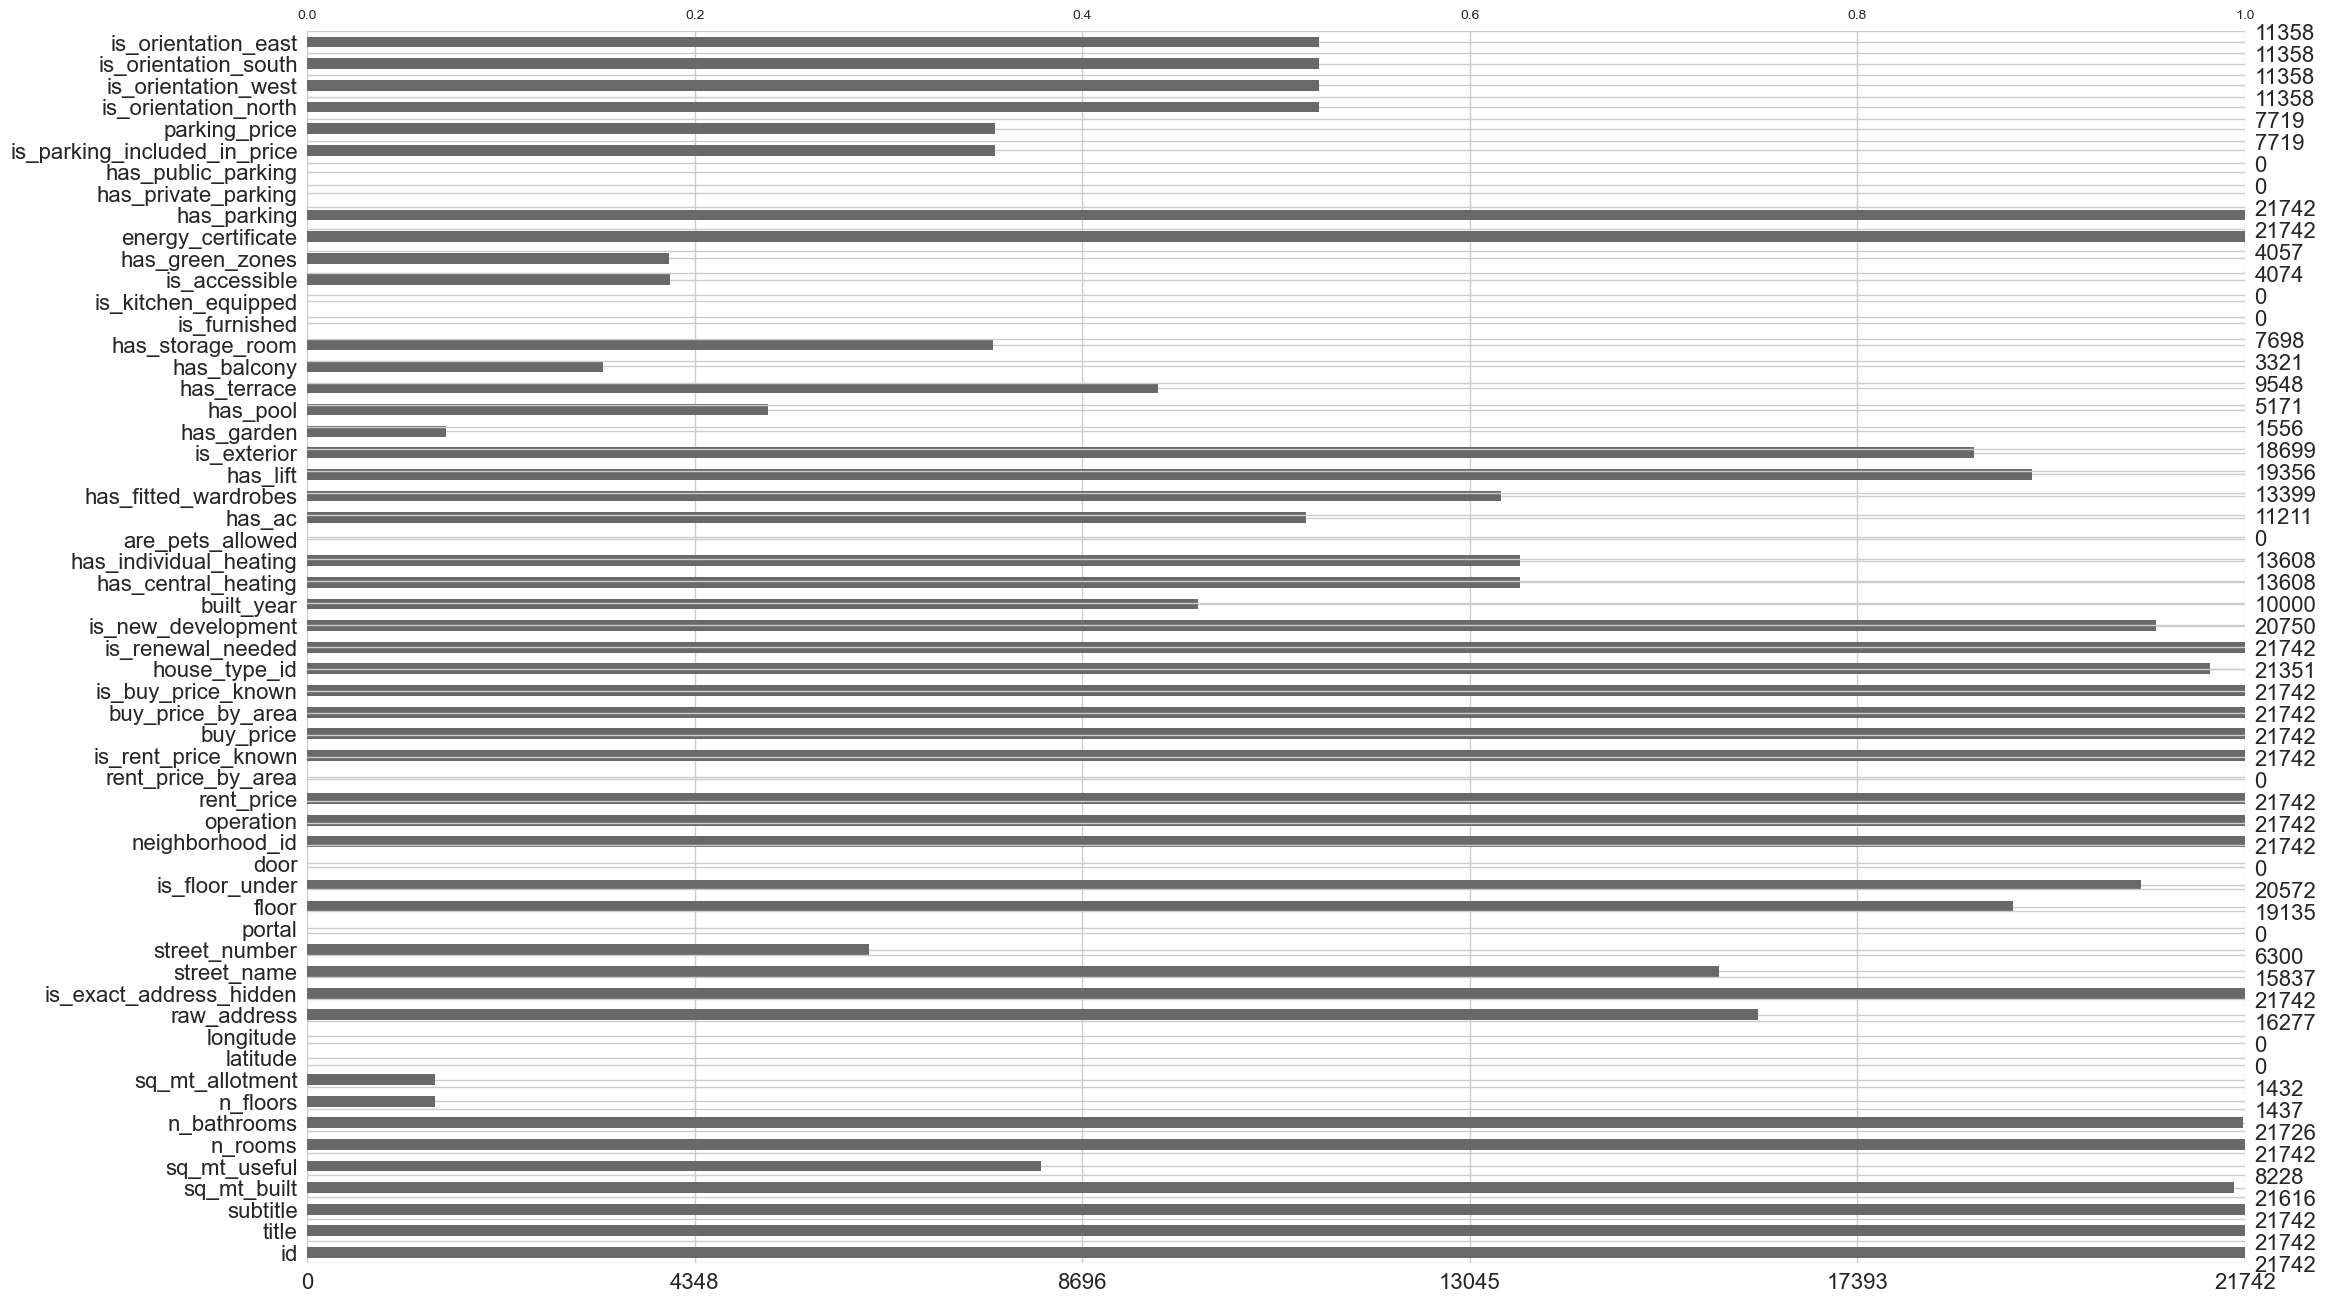

In [10]:
msno.bar(df)

Plusieurs colonnes sont vides, je commence par les supprimer.

In [11]:
df = df.dropna(axis=1, how='all')

<Axes: >

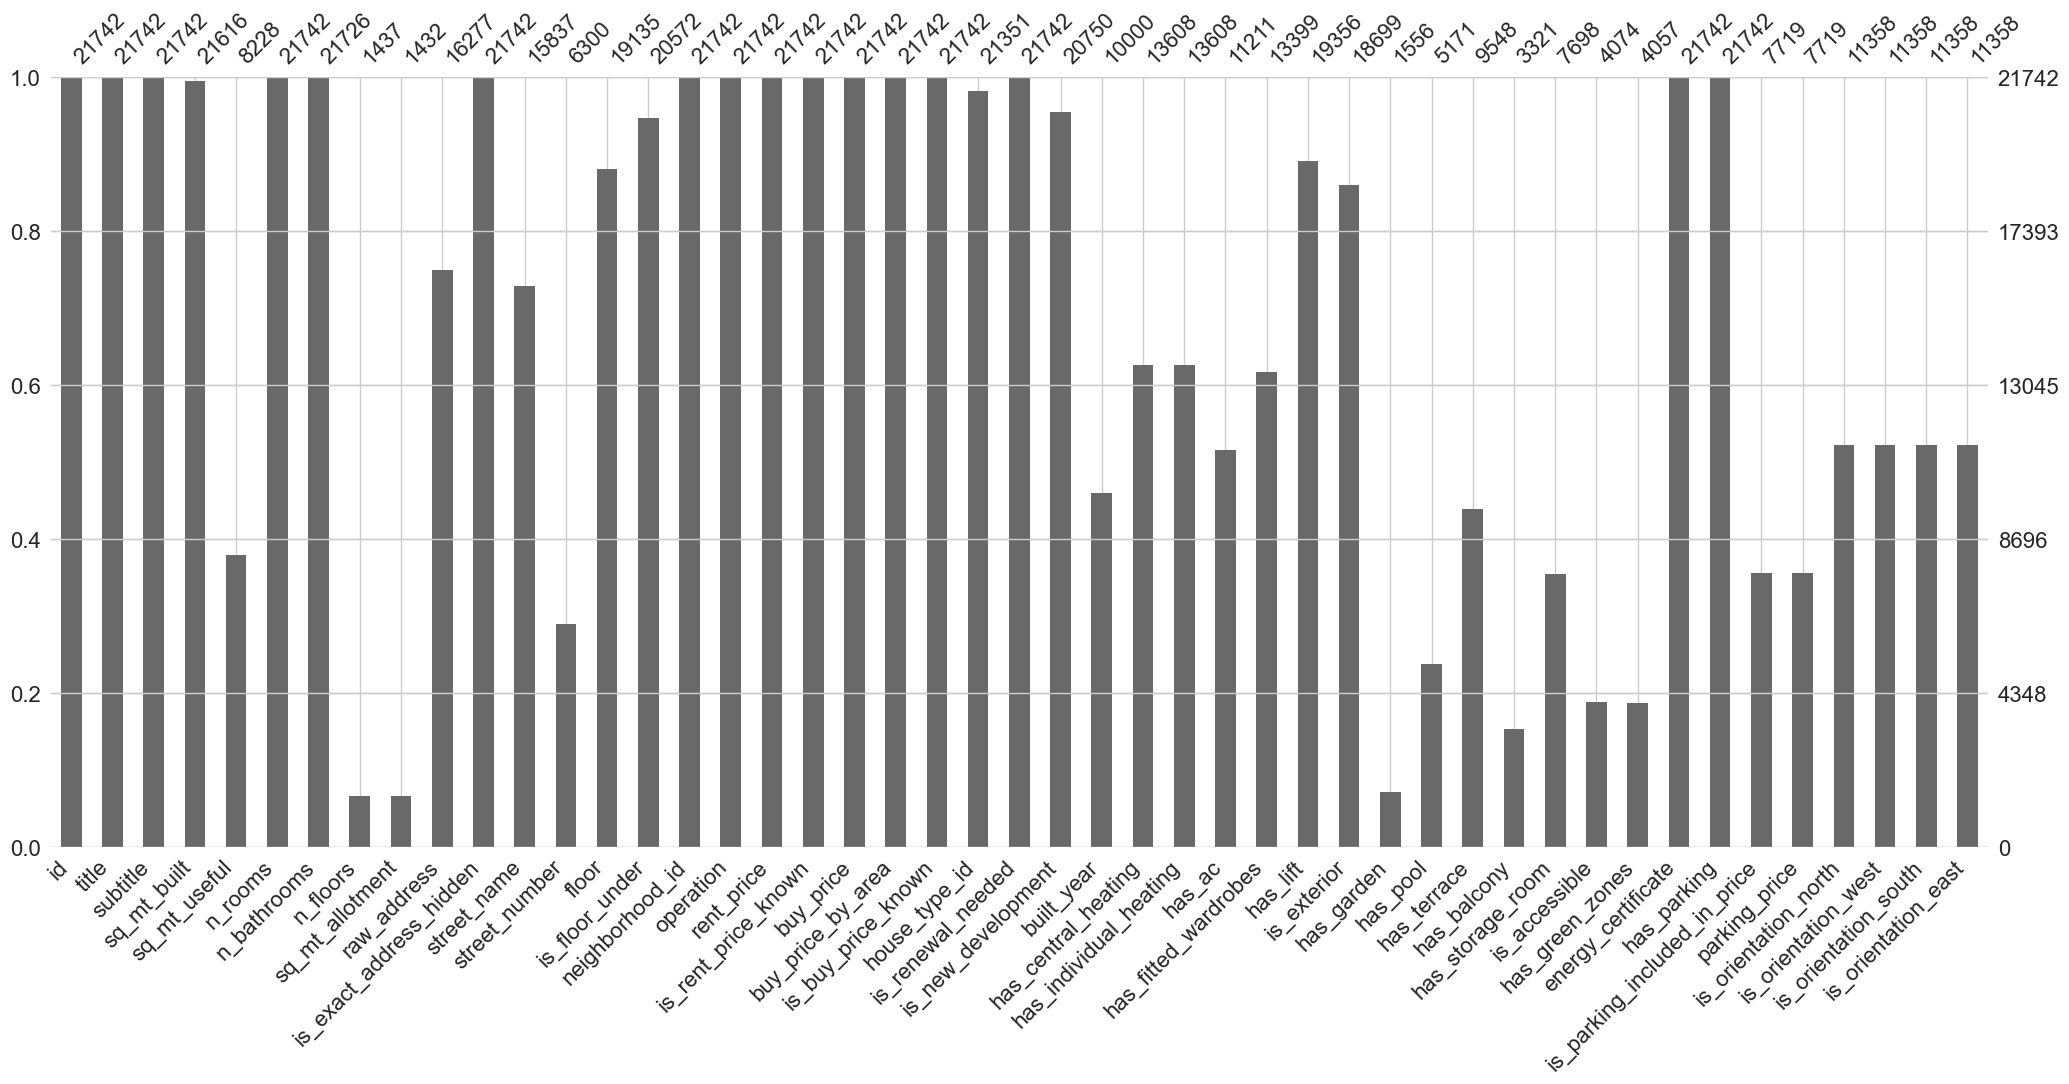

In [12]:
msno.bar(df)

In [13]:
df.head()

id                                              title  \
0  21742              Piso en venta en calle de Godella, 64   
1  21741   Piso en venta en calle de la del Manojo de Rosas   
2  21740               Piso en venta en calle del Talco, 68   
3  21739               Piso en venta en calle Pedro Jiménez   
4  21738  Piso en venta en carretera de Villaverde a Val...   

                subtitle  sq_mt_built  sq_mt_useful  n_rooms  n_bathrooms  \
0  San Cristóbal, Madrid         64.0          60.0        2          1.0   
1    Los Ángeles, Madrid         70.0           NaN        3          1.0   
2     San Andrés, Madrid         94.0          54.0        2          2.0   
3     San Andrés, Madrid         64.0           NaN        2          1.0   
4    Los Rosales, Madrid        108.0          90.0        2          2.0   

   n_floors  sq_mt_allotment                         raw_address  \
0       NaN              NaN                Calle de Godella, 64   
1       NaN              NaN     Calle de la del Manojo de Rosas   
2       NaN              NaN                 Calle del Talco, 68   
3       NaN              NaN                 Calle Pedro Jiménez   
4       NaN              NaN  Carretera de Villaverde a Vallecas   

   is_exact_address_hidden                         street_name street_number  \
0                    False                    Calle de Godella            64   
1                     True     Calle de la del Manojo de Rosas           NaN   
2                    False                     Calle del Talco            68   
3                     True                 Calle Pedro Jiménez           NaN   
4                     True  Carretera de Villaverde a Vallecas           NaN   

  floor is_floor_under                                    neighborhood_id  \
0     3          False  Neighborhood 135: San Cristóbal (1308.89 €/m2)...   
1     4          False  Neighborhood 132: Los Ángeles (1796.68 €/m2) -...   
2     1          False  Neighborhood 134: San Andrés (1617.18 €/m2) - ...   
3  Bajo           True  Neighborhood 134: San Andrés (1617.18 €/m2) - ...   
4     4          False  Neighborhood 133: Los Rosales (1827.79 €/m2) -...   

  operation  rent_price  is_rent_price_known  buy_price  buy_price_by_area  \
0      sale         471                False      85000               1328   
1      sale         666                False     129900               1856   
2      sale         722                False     144247               1535   
3      sale         583                False     109900               1717   
4      sale        1094                False     260000               2407   

   is_buy_price_known       house_type_id  is_renewal_needed  \
0                True  HouseType 1: Pisos              False   
1                True  HouseType 1: Pisos               True   
2                True  HouseType 1: Pisos              False   
3                True  HouseType 1: Pisos              False   
4                True  HouseType 1: Pisos              False   

  is_new_development  built_year has_central_heating has_individual_heating  \
0              False      1960.0                 NaN                    NaN   
1              False         NaN                 NaN                    NaN   
2              False         NaN               False                   True   
3              False      1955.0                 NaN                    NaN   
4              False      2003.0                 NaN                    NaN   

  has_ac has_fitted_wardrobes has_lift is_exterior has_garden has_pool  \
0   True                  NaN    False        True        NaN      NaN   
1    NaN                 True     True        True        NaN      NaN   
2    NaN                 True     True        True        NaN      NaN   
3    NaN                  NaN     True        True        NaN      NaN   
4   True                 True     True        True        NaN     True   

  has_terrace has_balcony has_storage

Après avoir retirer les colonnes vides, analysons nos colonnes:  
* id : identifiant de la vente
* title : titre de l'annonce
* subtitle : sous-titre de l'annonce
* sq_mt_built : surface bâtie (mètre carré)
* sq_mt_useful : surface habitable (mètre carré)
* n_rooms : nombre de pièce
* n_bathrooms : nombre de salle de bain
* n_floors : nombre d'étages
* sq_mt_allotment : lotissement (mètre carré)
* raw_address : adresse
* is_exact_address_hidden : adresse correcte (True / False)
* street_name : nom de la rue
* street_number : numéro de rue
* floor : Etage
* is_floor_under : contient un sous-sol
* neighborhood_id : identifiant du quartier
* operation : type de transaction (une valeur : vente )
* rent_price : prix de location 
* is_rent_price_known : prix de location connu (True / False)
* buy_price : prix d'achat
* buy_price_by_area : prix d'achat par mètre carré
* is_buy_price_known : prix d'achat connu (True / False)
* house_type_id : identifiant du type de maison
* is_renewal_needed : travaux nécessaire (True / False)
* built_year : année de construction
* has_central_heating : comprend un chauffage central
* has_individual_heating : comprend un chauffage individuel
* has_ac : comprend un climatiseur
* has_fitted_wardrobes : comprend des placards
* has_lift : comprend un ascenseur
* is_exterior : comprend un extérieur
* has_garden : comprend un jardin
* has_pool : comprend une piscine
* has_terrace : comprend une terrasse
* has_balcony : comprend un balcon
* has_storage_room : comprend un cagibi
* is_accessible : est accessible (moyens de transport ?)
* has_green_zones : comprend des espaces verts
* energy_certificate : certificat d'économie d'énergie
* has_parking : comprend un parking
* is_parking_included_in_price : prix du parking inclue dans le prix
* parking_price : prix du parking
* is_orientation_north : orientation nord
* is_orientation_west : orientation ouest
* is_orientation_south : orientation sud
* is_orientation_east : orientation est.

In [14]:
df.dtypes.value_counts()

object     30
float64     7
int64       5
bool        5
Name: count, dtype: int64

Plusieurs colonnes sont de type object alors qu'elles devraient être au format bool.

In [15]:
# Sélectionner les colonnes dont le nom commence par "is" ou "has"
selected_columns = df.filter(regex='^is|^has')

# Convertir le type de données des colonnes de "object" à "bool"
selected_columns = selected_columns.astype(bool)



In [16]:
df.dtypes.value_counts()

object     30
float64     7
int64       5
bool        5
Name: count, dtype: int64

## Imputation des valeurs manquantes des variables catégorielles.

<Axes: >

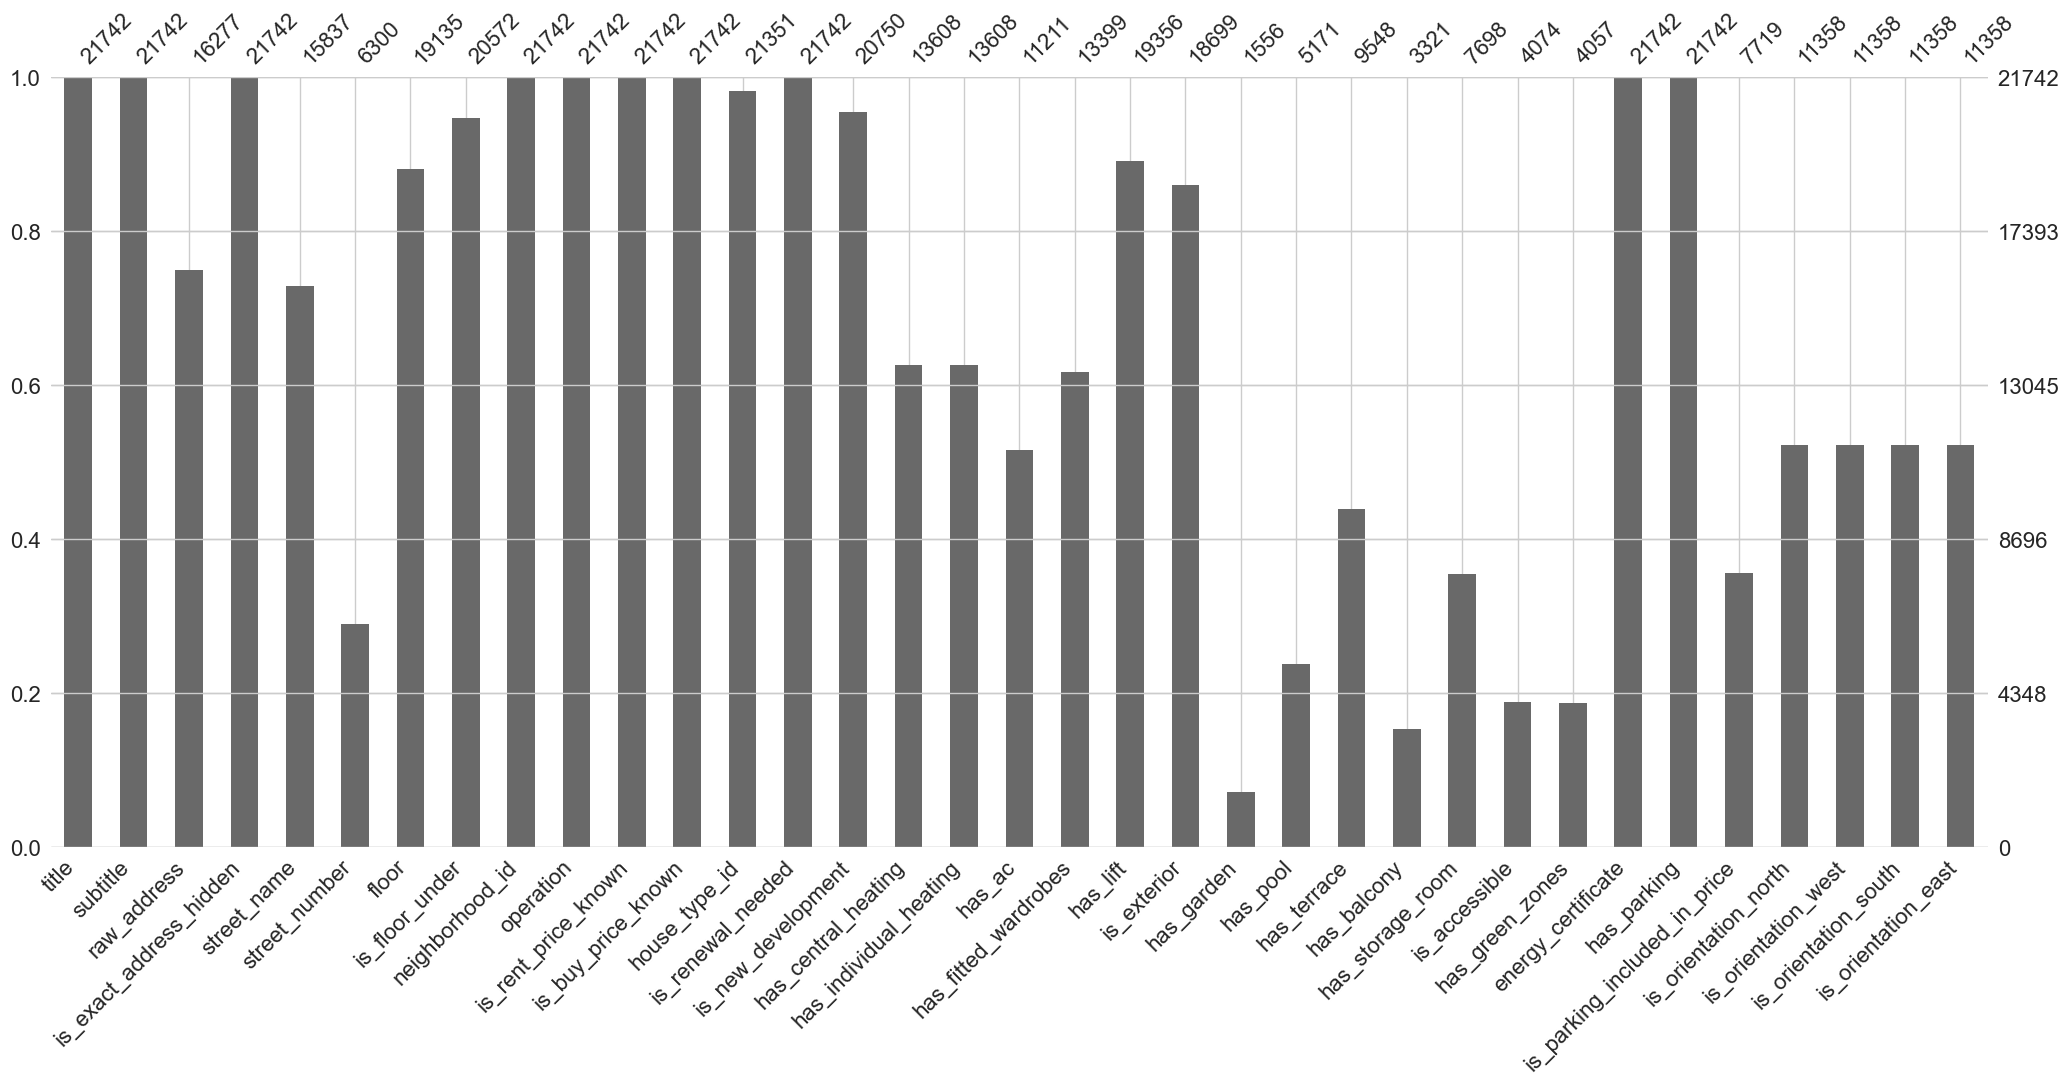

In [17]:
msno.bar(df.select_dtypes(include=['bool','object']))

In [18]:
for col in df.select_dtypes(include=['bool','object']):
    print('Colonne :',col)
    print('Valeurs manquantes :',df[col].isna().sum())
    print(df[col].unique()[:5])
    print(df[col].nunique())

Colonne : title
Valeurs manquantes : 0
['Piso en venta en calle de Godella, 64'
 'Piso en venta en calle de la del Manojo de Rosas'
 'Piso en venta en calle del Talco, 68'
 'Piso en venta en calle Pedro Jiménez'
 'Piso en venta en carretera de Villaverde a Vallecas']
10736
Colonne : subtitle
Valeurs manquantes : 0
['San Cristóbal, Madrid' 'Los Ángeles, Madrid' 'San Andrés, Madrid'
 'Los Rosales, Madrid' 'Villaverde, Madrid']
146
Colonne : raw_address
Valeurs manquantes : 5465
['Calle de Godella, 64' 'Calle de la del Manojo de Rosas'
 'Calle del Talco, 68' 'Calle Pedro Jiménez'
 'Carretera de Villaverde a Vallecas']
9666
Colonne : is_exact_address_hidden
Valeurs manquantes : 0
[False  True]
2
Colonne : street_name
Valeurs manquantes : 5905
['Calle de Godella' 'Calle de la del Manojo de Rosas' 'Calle del Talco'
 'Calle Pedro Jiménez' 'Carretera de Villaverde a Vallecas']
6177
Colonne : street_number
Valeurs manquantes : 15442
['64' nan '68' '67' '63']
420
Colonne : floor
Valeurs manquant

In [19]:
df.fillna({'n_floors': 0}, inplace=True)

In [20]:
colonne_has = ['has_garden','has_pool','has_terrace','has_balcony','has_storage_room','has_green_zones']


df[colonne_has] = df[colonne_has].apply(lambda col: col.fillna(False) if col.all() else col.fillna(True) if not col.any() else col, axis=0)


<Axes: >

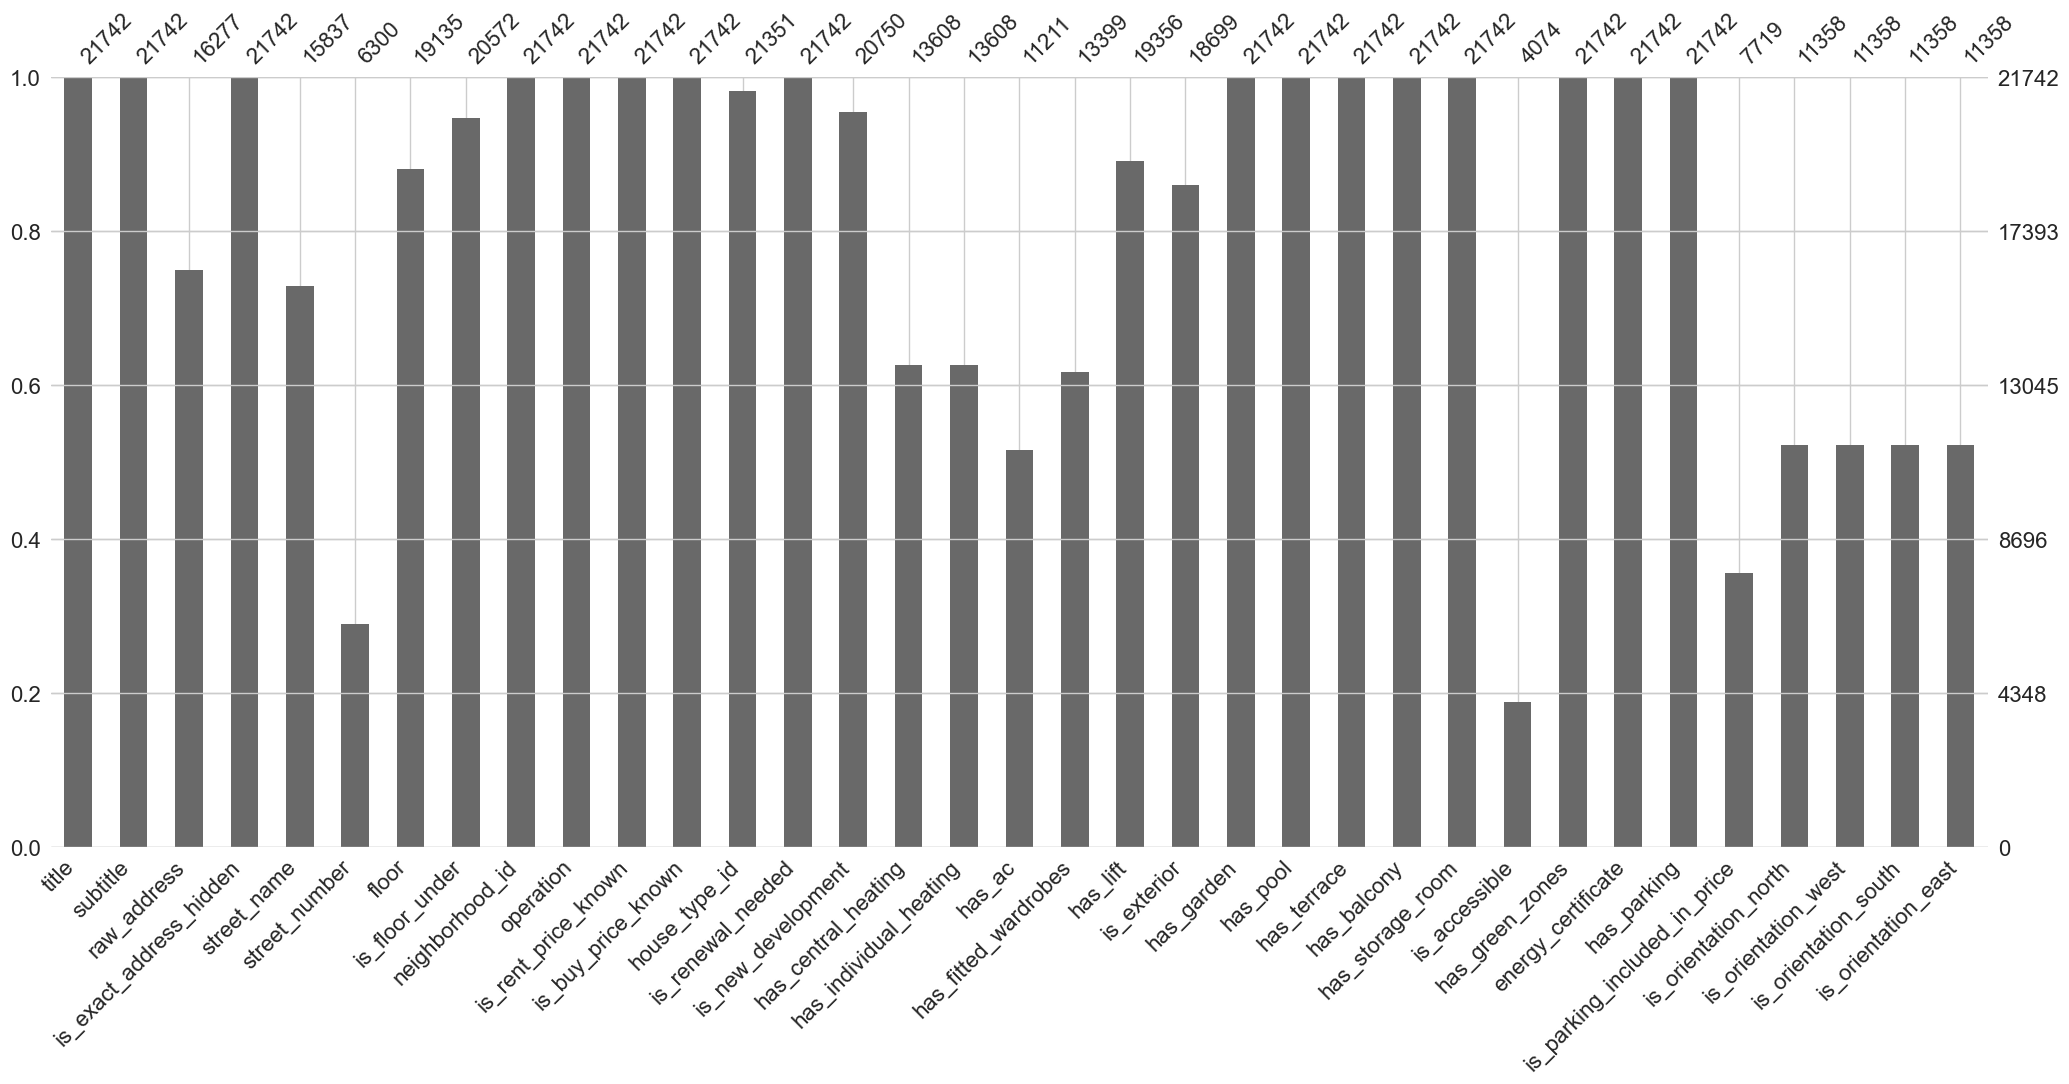

In [21]:
msno.bar(df.select_dtypes(include=['bool','object']))

Certaines colonnes ne seront pas utiles pour la suite. On les supprime du jeu de données.

In [22]:
col_obj_to_drop = ['title', 'subtitle', 'raw_address', 'street_name','is_rent_price_known','floor', 
                   'is_buy_price_known', 'street_number','operation','energy_certificate', 
                   'is_accessible','is_floor_under','is_new_development','has_central_heating',
                   'has_individual_heating','has_ac','has_fitted_wardrobes','is_exterior',
                   'is_parking_included_in_price','is_orientation_north','is_orientation_west',
                   'is_orientation_east','is_orientation_south','is_exact_address_hidden']
df.drop(col_obj_to_drop,axis=1,inplace=True)

In [23]:
pattern = r'Neighborhood (\d+): ([\w\s]+) \(([\d\.]+) €/m2\) - District (\d+): ([\w\s]+)'
df[['Neighborhood_number', 'nom_quartier', 'euro_m2', 'district_number', 'district']] = df['neighborhood_id'].str.extract(pattern)
df['district_number'] = df['district_number'].fillna(16)


In [24]:
df.drop(['neighborhood_id','Neighborhood_number','euro_m2'],axis=1,inplace=True)


In [25]:
df[['district_number','district']].value_counts(dropna=False)

district_number  district          
16               NaN                   4035
11               Moncloa               1651
3                Carabanchel           1508
6                Chamberí              1463
5                Chamartín             1457
7                Ciudad Lineal         1315
13               Puente de Vallecas    1116
15               Salamanca             1110
8                Fuencarral            1068
17               Tetuán                1013
1                Arganzuela            1003
14               Retiro                 855
9                Hortaleza              823
21               Villaverde             814
10               Latina                 749
18               Usera                  643
4                Centro                 399
20               Villa de Vallecas      260
12               Moratalaz              257
19               Vicálvaro              178
2                Barajas                 25
Name: count, dtype: int64

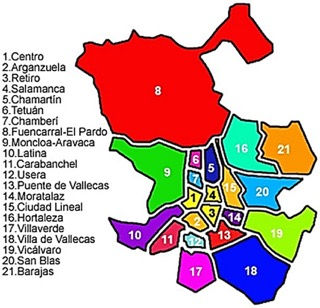

Il semble y a voir une erreur entre le nom et le numéro du district.

In [26]:
dico_district = {1:'Centro',
                 2: 'Arganzuela',
                 3: 'Retiro',
                 4: 'Salamanca',
                 5: 'Chamartín',
                 6: 'Tetuan',
                 7: 'Chamberi',
                 8: 'Fuencarral', 
                 9: 'Moncloa',
                 10: 'Latina',
                 11: 'Carabanchel',
                 12: 'Usera',
                 13: 'Puente de Vallecas',
                 14: 'Moratalaz',
                 15: 'Ciudad Lineal',
                 16: 'Hortaleza',
                 17: 'Villaverde',
                 18: 'Villa de Vallecas', 
                 19: 'Vicalvaro',
                 20: 'San Blas',
                 21:'Barajas'}
df['nom_quartier'] = df['district_number'].map(dico_district)
df['district_number'] = df['district_number'].astype('int64')

In [27]:
df.loc[df['nom_quartier'].isna(),'nom_quartier']='Hortaleza'
df.drop('district',axis=1,inplace=True)

In [28]:
df.dropna(subset=['house_type_id'], how='all', inplace=True)
df.loc[df['house_type_id'].str.contains("ticos"),'house_type_id'] = 'penthouse'
df.loc[df['house_type_id'].str.contains("plex"),'house_type_id'] = 'duplex'
df.loc[df['house_type_id'].str.contains("Casa"),'house_type_id'] = 'maison'
df.loc[df['house_type_id'].str.contains("Pisos"),'house_type_id'] = 'appartement'

In [29]:
df.loc[df['has_lift'].isna(),:]

id  sq_mt_built  sq_mt_useful  n_rooms  n_bathrooms  n_floors  \
15     21727        115.0           NaN        3          1.0       0.0   
23     21719         51.0           NaN        2          1.0       0.0   
25     21717         62.0           NaN        2          1.0       0.0   
32     21710         61.0           NaN        3          1.0       0.0   
85     21657        150.0           NaN        2          1.0       2.0   
...      ...          ...           ...      ...          ...       ...   
21729     13         59.0           NaN        3          1.0       0.0   
21730     12        289.0           NaN        5          3.0       3.0   
21731     11        276.0           NaN        4          4.0       4.0   
21733      9        267.0         215.0        5          3.0       2.0   
21740      2        289.0           NaN        4          3.0       3.0   

       sq_mt_allotment  rent_price  buy_price  buy_price_by_area  \
15                 NaN         780     160000               1391   
23                 NaN         508      93000               1824   
25                 NaN         557     104000               1677   
32                 NaN         539      99900               1638   
85                 NaN         777     159000               1060   
...                ...         ...        ...                ...   
21729              NaN         788     162000               2746   
21730              NaN        2369     820000               2837   
21731            189.0        2103     690000               2500   
21733            382.0        2315     790000               2959   
21740            304.0        2115     695000               2405   

      house_type_id  is_renewal_needed  built_year has_lift  has_garden  \
15      appartement              False         NaN      NaN       False   
23      appartement              False         NaN      NaN       False   
25      appartement              False         NaN      NaN       False   
32      appartement              False         NaN      NaN       False   
85           maison               True      1993.0      NaN       False   
...             ...                ...         ...      ...         ...   
21729   appartement              False      1969.0      NaN       False   
21730        maison              False         NaN      NaN        True   
21731        maison              False      2005.0      NaN        True   
21733        maison              False      2020.0      NaN        True   
21740        maison              False      1981.0      NaN        True   

       has_pool  has_terrace  has_balcony  has_storage_room  has_green_zones  \
15        False         True        False              True            False   
23        False        False        False             False            False   
25        False         True        False             False            False   
32        False         True        False             False            False   
85        False         True        False              True            False   
...         ...          ...          ...               ...              ...   
21729     False         True        False             False            False   
21730     False         True        False             False            False   
21731      True         True        False             False            False   
21733      True         True        False              True            False   
21740     False         True         True              True            False   

       has_parking  parking_price nom_quartier  district_number  
15           False            NaN    Hortaleza               21  
23           False            NaN    Hortaleza               21  
25           False            NaN    Hortaleza               21  
32           False            NaN    Hortaleza               21  
85            True            0.0    Hortaleza               21  
...            ...            ... 

Pour pouvoir imputer les valeurs manquantes de la colonne has_lift, on se réfère à la colonne 'n_floor'. On commence par mettre la valeur False aux logements dont le n_floor = 0

In [30]:
df.loc[(df['n_floors']!=0)|(df['house_type_id']=='penthouse'),'has_lift']=True

In [31]:
df.loc[(df['n_floors']!=0)&(df['house_type_id']=='appartement'),'has_lift']=True
df.loc[(df['n_floors']==0),'has_lift']=False

<Axes: >

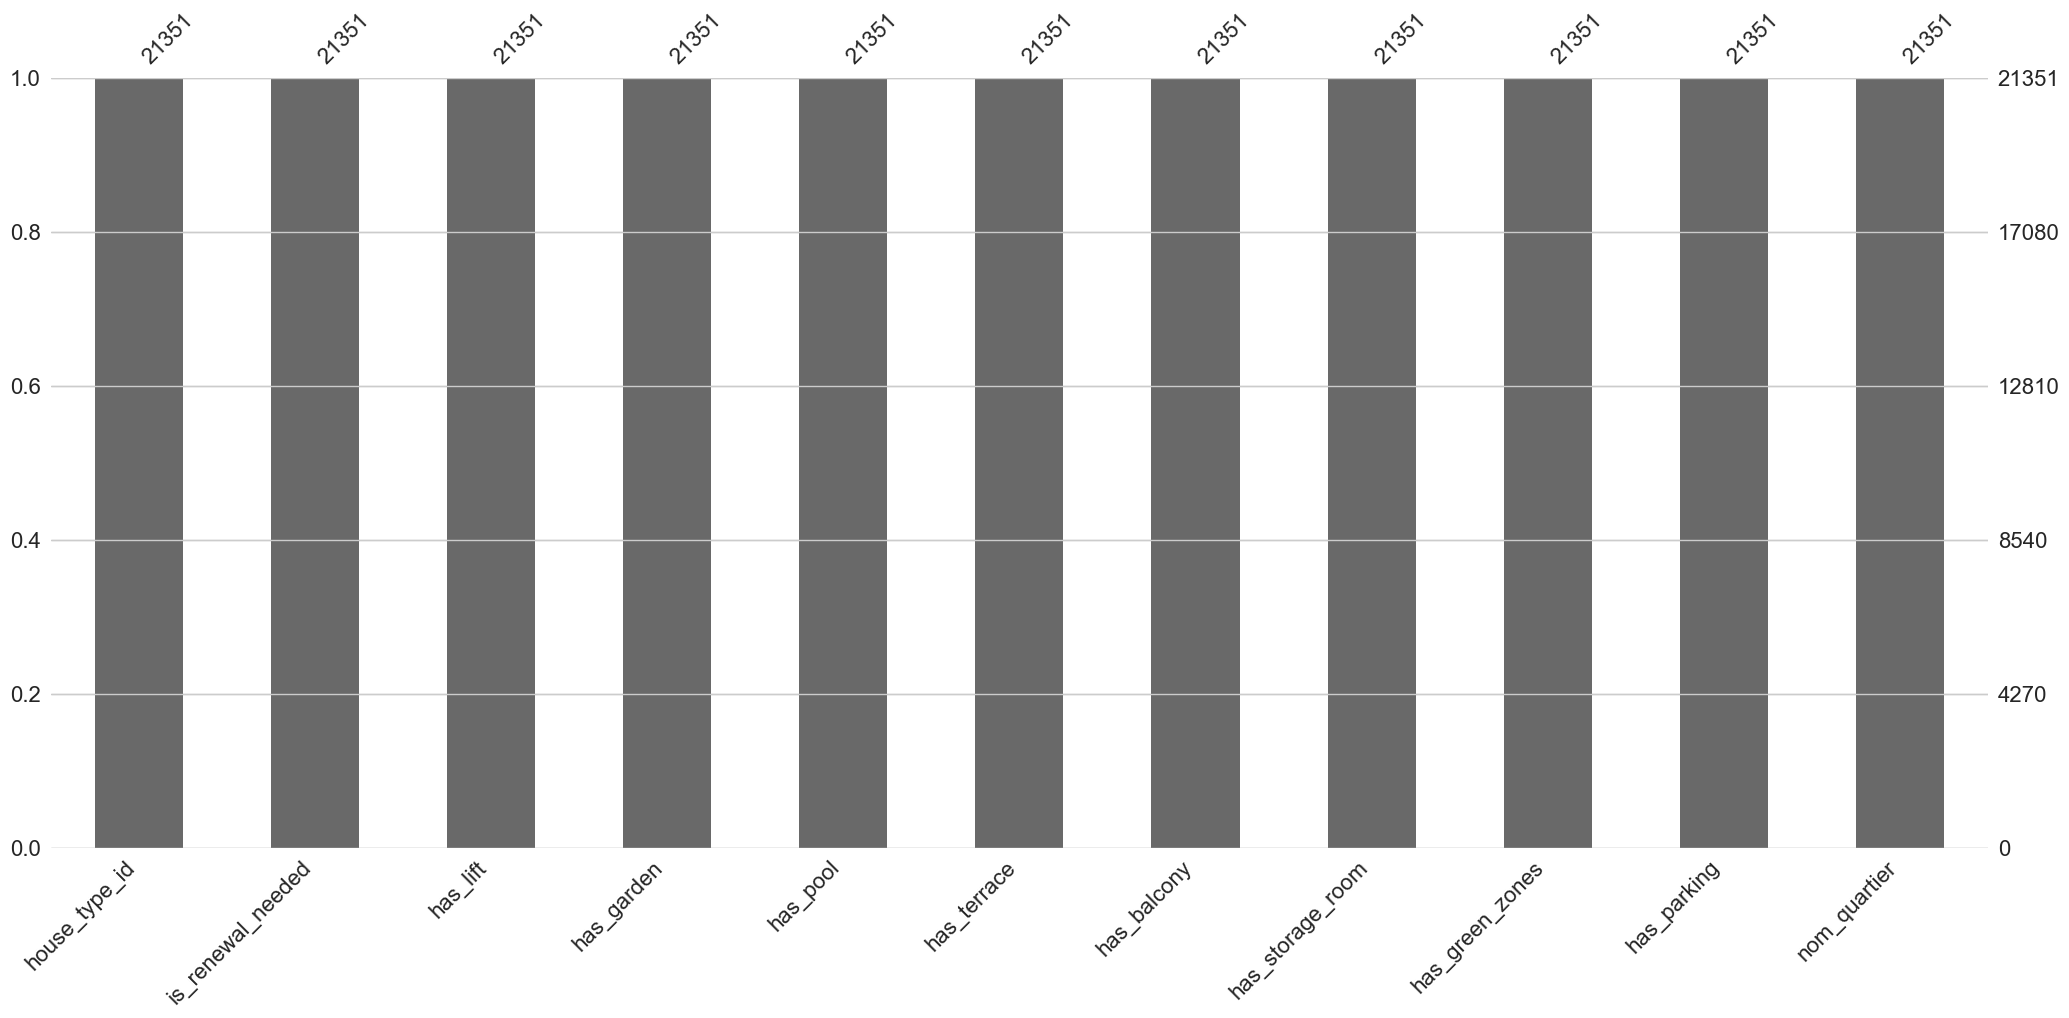

In [32]:
msno.bar(df.select_dtypes(include=['object','bool']))

Les variables catgorielles sont traitées. 

## Imputation des valeurs manquantes des variables quantitatives

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21351 entries, 0 to 21741
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21351 non-null  int64  
 1   sq_mt_built        21225 non-null  float64
 2   sq_mt_useful       8051 non-null   float64
 3   n_rooms            21351 non-null  int64  
 4   n_bathrooms        21337 non-null  float64
 5   n_floors           21351 non-null  float64
 6   sq_mt_allotment    1429 non-null   float64
 7   rent_price         21351 non-null  int64  
 8   buy_price          21351 non-null  int64  
 9   buy_price_by_area  21351 non-null  int64  
 10  house_type_id      21351 non-null  object 
 11  is_renewal_needed  21351 non-null  bool   
 12  built_year         9808 non-null   float64
 13  has_lift           21351 non-null  object 
 14  has_garden         21351 non-null  bool   
 15  has_pool           21351 non-null  bool   
 16  has_terrace        21351 no

<Axes: >

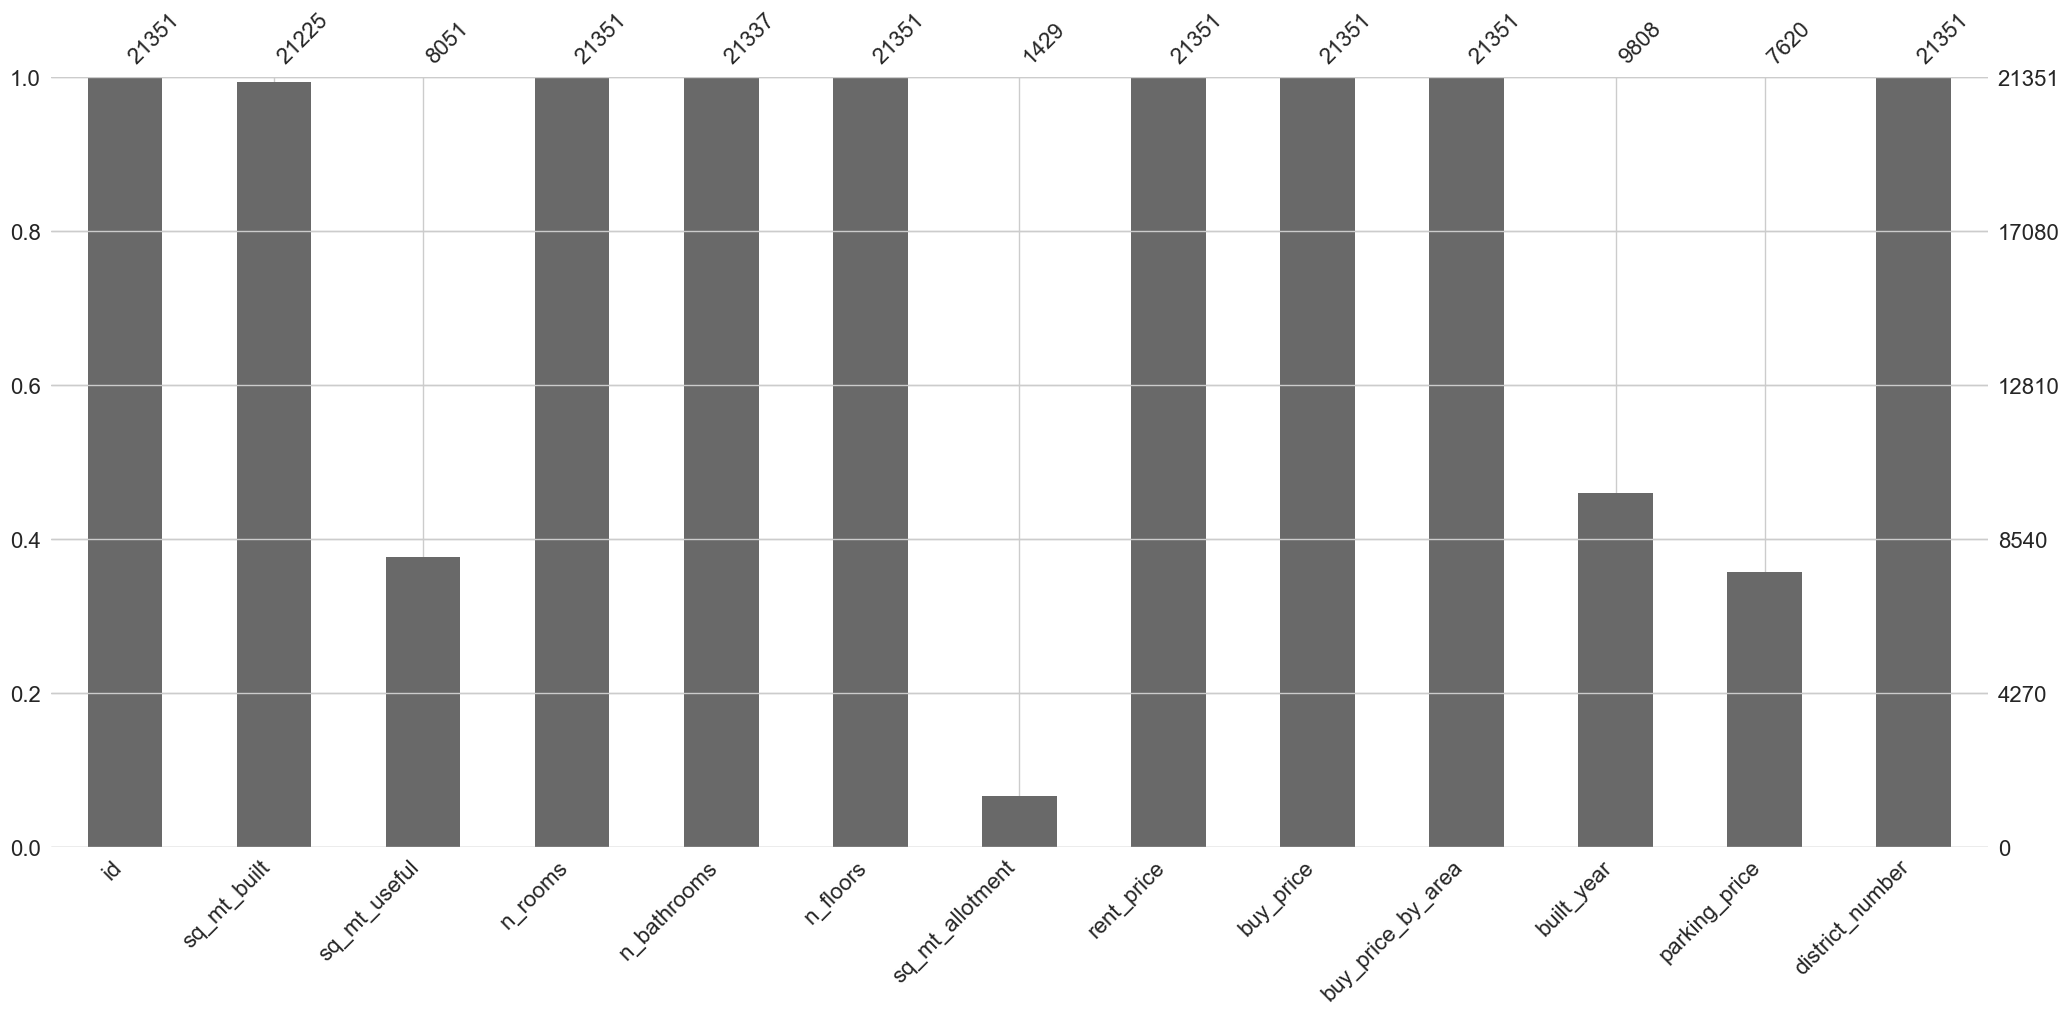

In [34]:
msno.bar(df.select_dtypes(include=['int','float']))

In [35]:
df.drop(['sq_mt_allotment','sq_mt_useful','parking_price','rent_price'], axis=1, inplace=True)
df.dropna(subset=['sq_mt_built'], how='all', inplace=True)
df.dropna(subset=['n_bathrooms'], how='all', inplace=True) 

In [36]:
for col in df.select_dtypes(include='float'):
    print(col)
    print(df[col].isna().sum())
    print(df[col].unique()[:10])

sq_mt_built
0
[ 64.  70.  94. 108. 126. 120. 125.  84.  85.  69.]
n_bathrooms
0
[ 1.  2.  3.  4.  6.  5. 14.  7.  9.  8.]
n_floors
0
[0. 2. 3. 4. 1. 5.]
built_year
11466
[1960.   nan 1955. 2003. 1981. 1950. 1963. 1992. 1983. 1984.]


<Axes: >

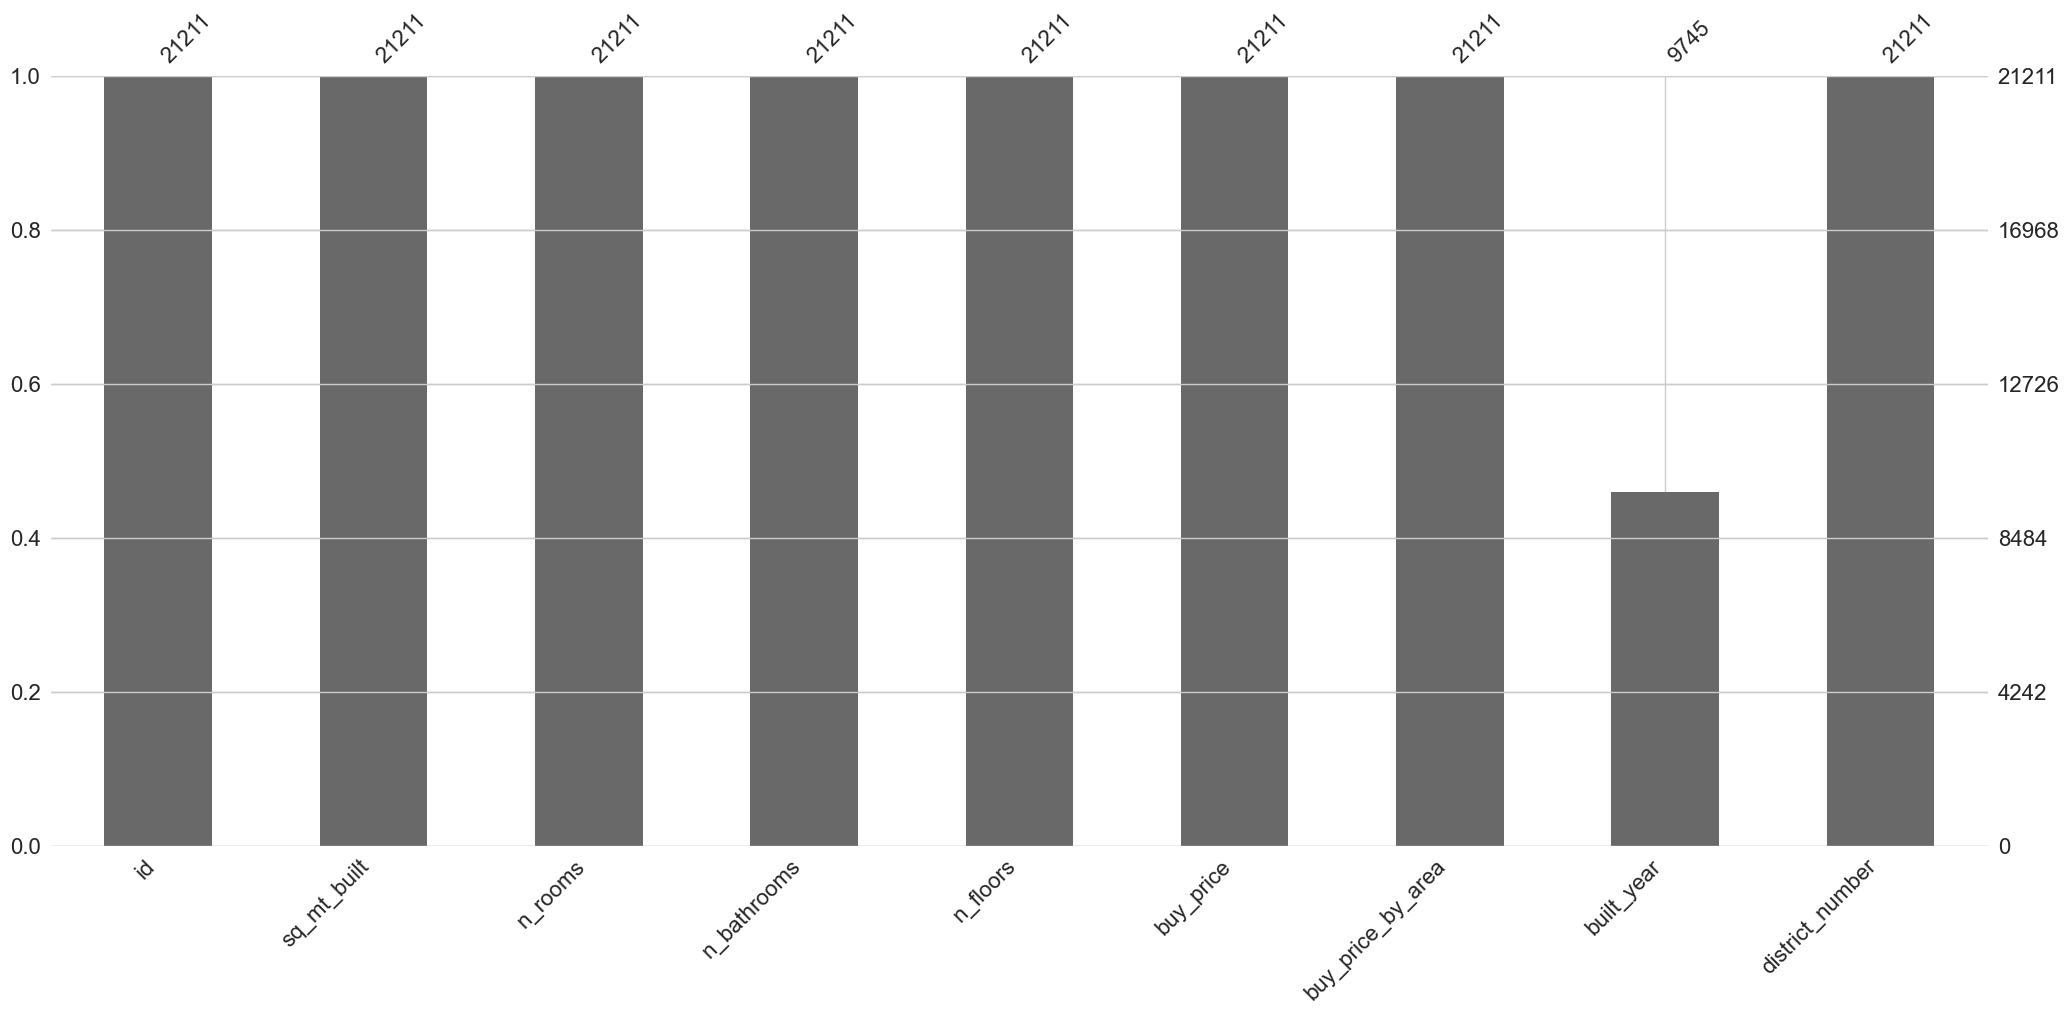

In [37]:
msno.bar(df.select_dtypes(include=['int','float']))

In [38]:
df.loc[df['built_year']==8170,:]

id  sq_mt_built  n_rooms  n_bathrooms  n_floors  buy_price  \
19235  2507         90.0        3          1.0       0.0     745000   

       buy_price_by_area house_type_id  is_renewal_needed  built_year  \
19235               8278   appartement              False      8170.0   

      has_lift  has_garden  has_pool  has_terrace  has_balcony  \
19235    False       False     False        False        False   

       has_storage_room  has_green_zones  has_parking nom_quartier  \
19235             False            False        False    Hortaleza   

       district_number  
19235               15

Il semble y avoir une erreur de frappe '8170' à la place de 1870.

In [39]:
df.loc[df['built_year']==8170,'built_year']= 1870

In [40]:
df["built_year"] = pd.to_numeric(df["built_year"])

In [41]:
df.describe()

id   sq_mt_built       n_rooms   n_bathrooms      n_floors  \
count  21211.000000  21211.000000  21211.000000  21211.000000  21211.000000   
mean   10860.590920    148.517279      3.034840      2.076470      0.200415   
std     6291.127168    134.560539      1.422047      1.336993      0.801255   
min        1.000000     16.000000      0.000000      1.000000      0.000000   
25%     5418.500000     71.000000      2.000000      1.000000      0.000000   
50%    10830.000000    101.000000      3.000000      2.000000      0.000000   
75%    16324.500000    165.000000      4.000000      2.000000      0.000000   
max    21742.000000    999.000000     24.000000     14.000000      5.000000   

          buy_price  buy_price_by_area   built_year  district_number  
count  2.121100e+04       21211.000000  9745.000000      21211.00000  
mean   6.437926e+05        4021.532648  1969.217034         11.00429  
std    7.471033e+05        1910.704763    30.999076          5.50054  
min    3.600000e+04         447.000000  1723.000000          1.00000  
25%    1.990000e+05        2550.000000  1957.000000          6.00000  
50%    3.780000e+05        3721.000000  1970.000000         11.00000  
75%    7.613250e+05        5000.000000  1993.000000         16.00000  
max    8.800000e+06       18889.000000  2022.000000         21.00000

A première vue, il semble que le jeu de données contient des outliers.  
Il serait pertinent d'utiliser l'écart inter-quartile pour les isoler.

In [42]:
def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers.count()

outliers_sum = {}

for column in df.select_dtypes('number').columns:
    outliers_sum[column] = iqr(df[column])

for column, sum_value in outliers_sum.items():
    print(f"La colonne {column} a une somme d'outliers de : {sum_value}")


La colonne id a une somme d'outliers de : 0
La colonne sq_mt_built a une somme d'outliers de : 2133
La colonne n_rooms a une somme d'outliers de : 174
La colonne n_bathrooms a une somme d'outliers de : 2681
La colonne n_floors a une somme d'outliers de : 1353
La colonne buy_price a une somme d'outliers de : 1829
La colonne buy_price_by_area a une somme d'outliers de : 556
La colonne built_year a une somme d'outliers de : 612
La colonne district_number a une somme d'outliers de : 0


col_liste = ['has_green_zones','has_terrace','has_balcony','has_storage_room','has_garden','has_lift','has_pool']
for col in df[col_liste]:
    df[col] = df[col].fillna('False')

In [43]:
col_dict={'sq_mt_built':'m2_construit','n_rooms':'nb_pieces','n_bathrooms':'nb_sdb','n_floors':'nb_etages',
         'buy_price':'prix_achat','buy_price_by_area':'prix_achat_m2','house_type_id':'type_maison',
         'is_renewal_needed':'travaux_necessaire','built_year':'annee_construction','has_lift':'ascenseur','has_garden':'jardin',
         'has_pool':'piscine','has_terrace':'terrace','has_balcony':'balcon','has_storage_room':'salle_rangement',
         'has_green_zones':'espace_vert','has_parking':'parking','district_number':'num_quartier'}
df.rename(columns=col_dict, inplace=True)

In [44]:
df=df.astype({"m2_construit":int, "nb_sdb":int, 'nb_sdb':int, 'nb_etages':int, 'ascenseur':bool,
          'jardin':bool, 'piscine':bool, 'terrace':bool, 'balcon':bool, 'salle_rangement':bool, 'espace_vert':bool,
          'num_quartier':int})

In [45]:
df = df[df['nb_pieces'] >= 1]
df = df[df['nb_sdb'] <= 6]
df = df[df['prix_achat'] <= 1750000]
df = df[df['prix_achat_m2'] <= 10000]
df = df[df['m2_construit'] <= 300]
#df.fillna({'annee_construction': 2077}, inplace=True)


In [46]:
df = pd.get_dummies(df, prefix=['type'], columns=['type_maison'])#,drop_first=True)
df.drop('id', axis=1, inplace=True)

In [47]:
df.columns

Index(['m2_construit', 'nb_pieces', 'nb_sdb', 'nb_etages', 'prix_achat',
       'prix_achat_m2', 'travaux_necessaire', 'annee_construction',
       'ascenseur', 'jardin', 'piscine', 'terrace', 'balcon',
       'salle_rangement', 'espace_vert', 'parking', 'nom_quartier',
       'num_quartier', 'type_appartement', 'type_duplex', 'type_maison',
       'type_penthouse'],
      dtype='object')

In [48]:
df = df[['m2_construit', 'nb_pieces', 'nb_sdb', 'nb_etages', 
       'prix_achat', 'prix_achat_m2', 'travaux_necessaire','annee_construction', 'ascenseur',
       'jardin', 'piscine', 'terrace', 'balcon', 'salle_rangement',
       'espace_vert', 'parking', 'num_quartier',
       'type_appartement', 'type_duplex', 'type_maison', 'type_penthouse', 'nom_quartier']]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18515 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   m2_construit        18515 non-null  int64  
 1   nb_pieces           18515 non-null  int64  
 2   nb_sdb              18515 non-null  int64  
 3   nb_etages           18515 non-null  int64  
 4   prix_achat          18515 non-null  int64  
 5   prix_achat_m2       18515 non-null  int64  
 6   travaux_necessaire  18515 non-null  bool   
 7   annee_construction  8401 non-null   float64
 8   ascenseur           18515 non-null  bool   
 9   jardin              18515 non-null  bool   
 10  piscine             18515 non-null  bool   
 11  terrace             18515 non-null  bool   
 12  balcon              18515 non-null  bool   
 13  salle_rangement     18515 non-null  bool   
 14  espace_vert         18515 non-null  bool   
 15  parking             18515 non-null  bool   
 16  num_quart

### Imputation des valeurs de la colonne annee_construction

In [50]:
df.loc[df['annee_construction'].isna(),:]

m2_construit  nb_pieces  nb_sdb  nb_etages  prix_achat  prix_achat_m2  \
1                70          3       1          0      129900           1856   
2                94          2       2          0      144247           1535   
6               120          5       2          0      190000           1583   
7               125          3       2          0      198500           1588   
8                84          3       2          0      212000           2524   
...             ...        ...     ...        ...         ...            ...   
21730           289          5       3          3      820000           2837   
21734            89          3       1          0      275000           3090   
21735            88          2       2          0      360000           4420   
21736            99          2       2          0      349000           3525   
21741            72          2       2          0      424000           5889   

       travaux_necessaire  annee_construction  ascenseur  jardin  piscine  \
1                    True                 NaN      False   False    False   
2                   False                 NaN      False   False    False   
6                   False                 NaN      False   False     True   
7                   False                 NaN      False   False    False   
8                   False                 NaN      False   False     True   
...                   ...                 ...        ...     ...      ...   
21730               False                 NaN       True    True    False   
21734               False                 NaN      False   False    False   
21735               False                 NaN      False   False     True   
21736               False                 NaN      False   False     True   
21741               False                 NaN      False   False     True   

       terrace  balcon  salle_rangement  espace_vert  parking  num_quartier  \
1         True   False            False        False    False            21   
2        False   False             True        False    False            21   
6         True    True             True         True     True            21   
7         True   False            False        False    False            21   
8        False   False             True         True     True            21   
...        ...     ...              ...          ...      ...           ...   
21730     True   False            False        False     True             2   
21734     True   False            False         True    False             2   
21735    False   False             True        False     True            16   
21736    False   False             True        False     True            16   
21741     True   False            False        False     True             1   

       type_appartement  type_duplex  type_maison  type_penthouse nom_quartier  
1                  True        False        False           False    Hortaleza  
2                  True        False        False           False    Hortaleza  
6                  True        False        False           False    Hortaleza  
7                  True        False        False           False    Hortaleza  
8                  True        False        False           False    Hortaleza  
...                 ...          ...          ...             ...          ...  
21730             False        False         True           False    Hortaleza  
21734              True        False        False           False    Hortaleza  
21735              True        False        False           False    Hortaleza  
21736              True        False        False           False    Hortaleza  
21741              True        False        False           False    Hortaleza  

[10114 rows x 22 columns]

In [51]:
df['annee_construction'].isna().mean()

0.5462597893599784

 Cette colonne contient 54% de données manquantes. On va tenter d'imputer avec un modèle de type ElasticNetCV

In [52]:
df.describe()

m2_construit     nb_pieces        nb_sdb     nb_etages    prix_achat  \
count  18515.000000  18515.000000  18515.000000  18515.000000  1.851500e+04   
mean     107.971429      2.748420      1.722009      0.055901  4.322183e+05   
std       54.850161      1.098039      0.840344      0.411377  3.291780e+05   
min       16.000000      1.000000      1.000000      0.000000  3.600000e+04   
25%       69.000000      2.000000      1.000000      0.000000  1.850000e+05   
50%       92.000000      3.000000      2.000000      0.000000  3.250000e+05   
75%      134.000000      3.000000      2.000000      0.000000  5.800000e+05   
max      300.000000     14.000000      6.000000      5.000000  1.750000e+06   

       prix_achat_m2  annee_construction  num_quartier  
count   18515.000000         8401.000000  18515.000000  
mean     3824.669403         1967.932746     11.039265  
std      1675.142724           30.881677      5.658766  
min       706.000000         1800.000000      1.000000  
25%      2462.000000         1956.000000      6.000000  
50%      3615.000000         1969.000000     11.000000  
75%      4828.500000         1991.000000     16.000000  
max     10000.000000         2022.000000     21.000000

In [53]:
df.sort_values(by='annee_construction')

m2_construit  nb_pieces  nb_sdb  nb_etages  prix_achat  prix_achat_m2  \
17371            54          1       1          0      269000           4981   
18206           104          3       1          0      530000           5096   
17771           232          3       3          0     1250000           5388   
21632           234          2       2          0     1195000           5107   
18109           147          2       2          0     1150000           7823   
...             ...        ...     ...        ...         ...            ...   
21730           289          5       3          3      820000           2837   
21734            89          3       1          0      275000           3090   
21735            88          2       2          0      360000           4420   
21736            99          2       2          0      349000           3525   
21741            72          2       2          0      424000           5889   

       travaux_necessaire  annee_construction  ascenseur  jardin  piscine  \
17371               False              1800.0      False   False    False   
18206               False              1800.0      False   False    False   
17771               False              1810.0      False   False    False   
21632               False              1848.0      False   False    False   
18109               False              1850.0      False   False    False   
...                   ...                 ...        ...     ...      ...   
21730               False                 NaN       True    True    False   
21734               False                 NaN      False   False    False   
21735               False                 NaN      False   False     True   
21736               False                 NaN      False   False     True   
21741               False                 NaN      False   False     True   

       terrace  balcon  salle_rangement  espace_vert  parking  num_quartier  \
17371    False    True            False        False    False            16   
18206    False   False            False        False    False             4   
17771     True   False            False        False    False            16   
21632    False   False            False        False    False            16   
18109    False   False            False        False    False             4   
...        ...     ...              ...          ...      ...           ...   
21730     True   False            False        False     True             2   
21734     True   False            False         True    False             2   
21735    False   False             True        False     True            16   
21736    False   False             True        False     True            16   
21741     True   False            False        False     True             1   

       type_appartement  type_duplex  type_maison  type_penthouse nom_quartier  
17371              True        False        False           False    Hortaleza  
18206              True        False        False           False    Hortaleza  
17771              True        False        False           False    Hortaleza  
21632              True        False        False           False    Hortaleza  
18109              True        False        False           False    Hortaleza  
...                 ...          ...          ...             ...          ...  
21730             False        False         True           False    Hortaleza  
21734              True        False        False           False    Hortaleza  
21735              True        False        False           False    Hortaleza  
21736              True        False        False           False    Hortaleza  
21741              True        False        False           False    Hortaleza  

[18515 rows x 22 columns]

In [54]:
sorted(df['annee_construction'].unique())

[1935.0,
 1960.0,
 nan,
 1800.0,
 1810.0,
 1848.0,
 1850.0,
 1853.0,
 1860.0,
 1866.0,
 1870.0,
 1871.0,
 1875.0,
 1877.0,
 1879.0,
 1880.0,
 1881.0,
 1882.0,
 1883.0,
 1884.0,
 1885.0,
 1887.0,
 1888.0,
 1889.0,
 1890.0,
 1891.0,
 1892.0,
 1895.0,
 1896.0,
 1897.0,
 1899.0,
 1900.0,
 1901.0,
 1902.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 198

df_annee = df[df['annee_construction'] > 1950]
df_annee = df_annee[df_annee['annee_construction'] <= 2024]

data = df_annee.drop(['annee_construction','nom_quartier'], axis=1)
target = df_annee['annee_construction']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [55]:
df.loc[df['annee_construction']<1900,:]

m2_construit  nb_pieces  nb_sdb  nb_etages  prix_achat  prix_achat_m2  \
3872            249          4       3          0     1500000           6024   
6931             71          3       2          0      265000           3732   
8223            131          4       2          0      525000           4008   
11009            48          1       1          0      330000           6875   
11010            95          4       1          0      239000           2516   
...             ...        ...     ...        ...         ...            ...   
20637            40          2       1          0      180000           4500   
21187           135          3       2          0      550000           4074   
21631            78          1       1          0      415000           5321   
21632           234          2       2          0     1195000           5107   
21639            91          3       2          0      550000           6044   

       travaux_necessaire  annee_construction  ascenseur  jardin  piscine  \
3872                 True              1890.0      False   False    False   
6931                 True              1880.0      False   False    False   
8223                 True              1890.0      False   False    False   
11009               False              1884.0      False   False    False   
11010               False              1881.0      False   False    False   
...                   ...                 ...        ...     ...      ...   
20637               False              1883.0      False   False    False   
21187               False              1890.0      False   False    False   
21631               False              1880.0      False   False    False   
21632               False              1848.0      False   False    False   
21639               False              1880.0      False   False    False   

       terrace  balcon  salle_rangement  espace_vert  parking  num_quartier  \
3872      True   False            False        False     True            14   
6931     False   False            False        False    False            11   
8223     False    True            False        False    False            11   
11009    False   False            False        False    False             6   
11010    False   False            False        False    False             6   
...        ...     ...              ...          ...      ...           ...   
20637    False   False            False        False    False             1   
21187    False   False            False        False    False             4   
21631    False   False            False        False    False             4   
21632    False   False            False        False    False            16   
21639    False   False            False        False    False            16   

       type_appartement  type_duplex  type_maison  type_penthouse nom_quartier  
3872              False        False        False            True    Hortaleza  
6931               True        False        False           False    Hortaleza  
8223               True        False        False           False    Hortaleza  
11009              True        False        False           False    Hortaleza  
11010              True        False        False           False    Hortaleza  
...                 ...          ...          ...             ...          ...  
20637              True        False        False           False    Hortaleza  
21187              True        False        False           False    Hortaleza  
21631              True        False        False           False    Hortaleza  
21632              True        False        False           False    Hortaleza  
21639              True        False        False           False    Hortaleza  

[153 rows x 22 columns]

In [56]:
#df = df[df['annee_construction'] > 1899]


In [57]:
train = df.loc[~df['annee_construction'].isna(),:]
data_train = train.drop(['annee_construction','nom_quartier'], axis=1)
target_train = train['annee_construction']
X_train, X_test, y_train, y_test = train_test_split(data_train,target_train, test_size=0.2)

test = df.loc[df['annee_construction'].isna(),:]
data_test = test.drop(['annee_construction','nom_quartier'], axis=1)
target_test = test['annee_construction']


In [58]:
from sklearn.preprocessing import RobustScaler
scaler_en = RobustScaler()
X_train_scaled = scaler_en.fit_transform(X_train)
X_test_scaled = scaler_en.transform(X_test)
data_test_scaled = scaler_en.transform(data_test)

In [59]:
model_annee = ElasticNetCV(cv=5, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),max_iter=10000)

model_annee.fit(X_train_scaled, y_train)
print('')

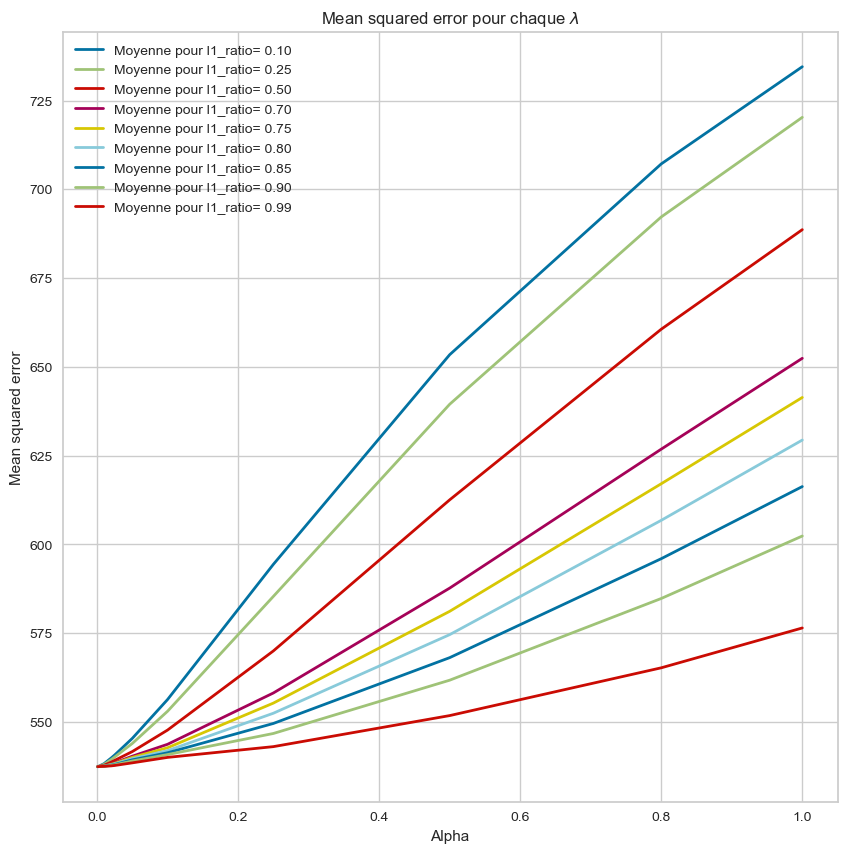

In [60]:
alphas = model_annee.alphas_

plt.figure(figsize=(10, 10))

for i in range(model_annee.mse_path_.shape[0]) :
    plt.plot(alphas, model_annee.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %model_annee.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

In [61]:
pred_train = model_annee.predict(X_train_scaled)
pred_test = model_annee.predict(X_test_scaled)

print(np.sqrt(mean_squared_error(y_train, pred_train)))
print(np.sqrt(mean_squared_error(y_test, pred_test)))

23.105014381644374
22.432426311519297


In [62]:
print('score train :', model_annee.score(X_train_scaled, y_train))
print('score test :', model_annee.score(X_test_scaled, y_test))

score train : 0.44231503292483487
score test : 0.46387824055088156


In [63]:
pd.DataFrame({'points_observés': y_test, 'points_predits' : np.round(pred_test)}, 
             index=X_test.index).head(7)

points_observés  points_predits
8844            2020.0          1965.0
13017           1982.0          1981.0
5538            1959.0          1977.0
3492            1973.0          1957.0
12317           1991.0          1963.0
6840            2001.0          1984.0
13392           1965.0          1971.0

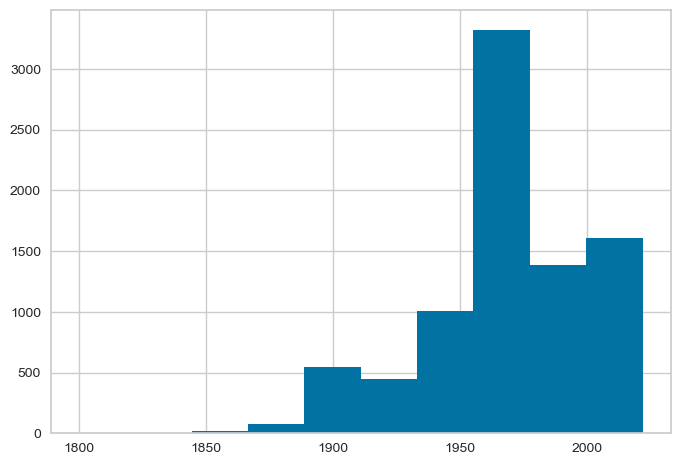

In [64]:
df.loc[df['annee_construction'] <= 2024].annee_construction.hist();

In [65]:
df_sans_nan = df.loc[~df['annee_construction'].isna(),:]
df_nan = df.loc[df['annee_construction'].isna(),:]

In [66]:
df_nan = df_nan.drop(['annee_construction','nom_quartier'],axis=1)

In [67]:
scaler_nan = RobustScaler()
df_nan_scaled = scaler_nan.fit_transform(df_nan)

In [68]:
df_nan['annee_construction'] = model_annee.predict(df_nan_scaled)

In [69]:
df_final = pd.concat([df_sans_nan,df_nan],axis=0)

In [70]:
df_final['nom_quartier'] = df['num_quartier'].map(dico_district)

In [71]:
df_final['annee_construction'] = df_final['annee_construction'].astype('int')

In [72]:
df_final.describe()

m2_construit     nb_pieces        nb_sdb     nb_etages    prix_achat  \
count  18515.000000  18515.000000  18515.000000  18515.000000  1.851500e+04   
mean     107.971429      2.748420      1.722009      0.055901  4.322183e+05   
std       54.850161      1.098039      0.840344      0.411377  3.291780e+05   
min       16.000000      1.000000      1.000000      0.000000  3.600000e+04   
25%       69.000000      2.000000      1.000000      0.000000  1.850000e+05   
50%       92.000000      3.000000      2.000000      0.000000  3.250000e+05   
75%      134.000000      3.000000      2.000000      0.000000  5.800000e+05   
max      300.000000     14.000000      6.000000      5.000000  1.750000e+06   

       prix_achat_m2  annee_construction  num_quartier  
count   18515.000000        18515.000000  18515.000000  
mean     3824.669403         1968.229706     11.039265  
std      1675.142724           25.693251      5.658766  
min       706.000000         1800.000000      1.000000  
25%      2462.000000         1955.000000      6.000000  
50%      3615.000000         1967.000000     11.000000  
75%      4828.500000         1984.000000     16.000000  
max     10000.000000         2027.000000     21.000000

In [73]:
df_final = df.loc[df['annee_construction']<=2024,:]

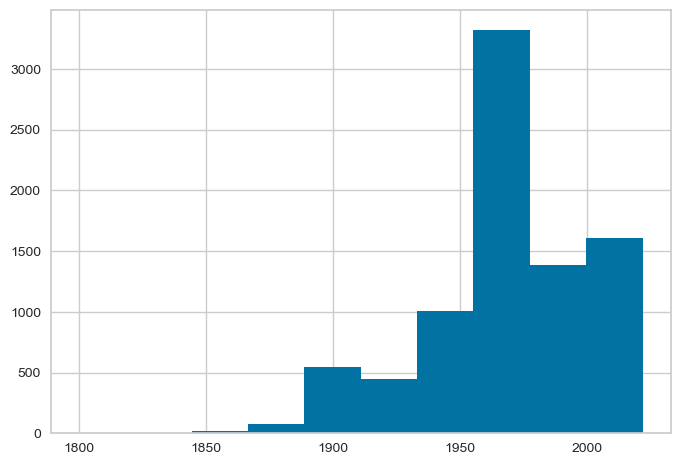

In [74]:
df_final.annee_construction.hist();

In [75]:
visu = df_final.copy()

In [76]:
visu.to_csv('visuel.csv')

# Tests différents modèles de regression

## ElasticNet version Sarah

## Regression linéaire simple

In [77]:
df_annee = df_final.copy()

/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


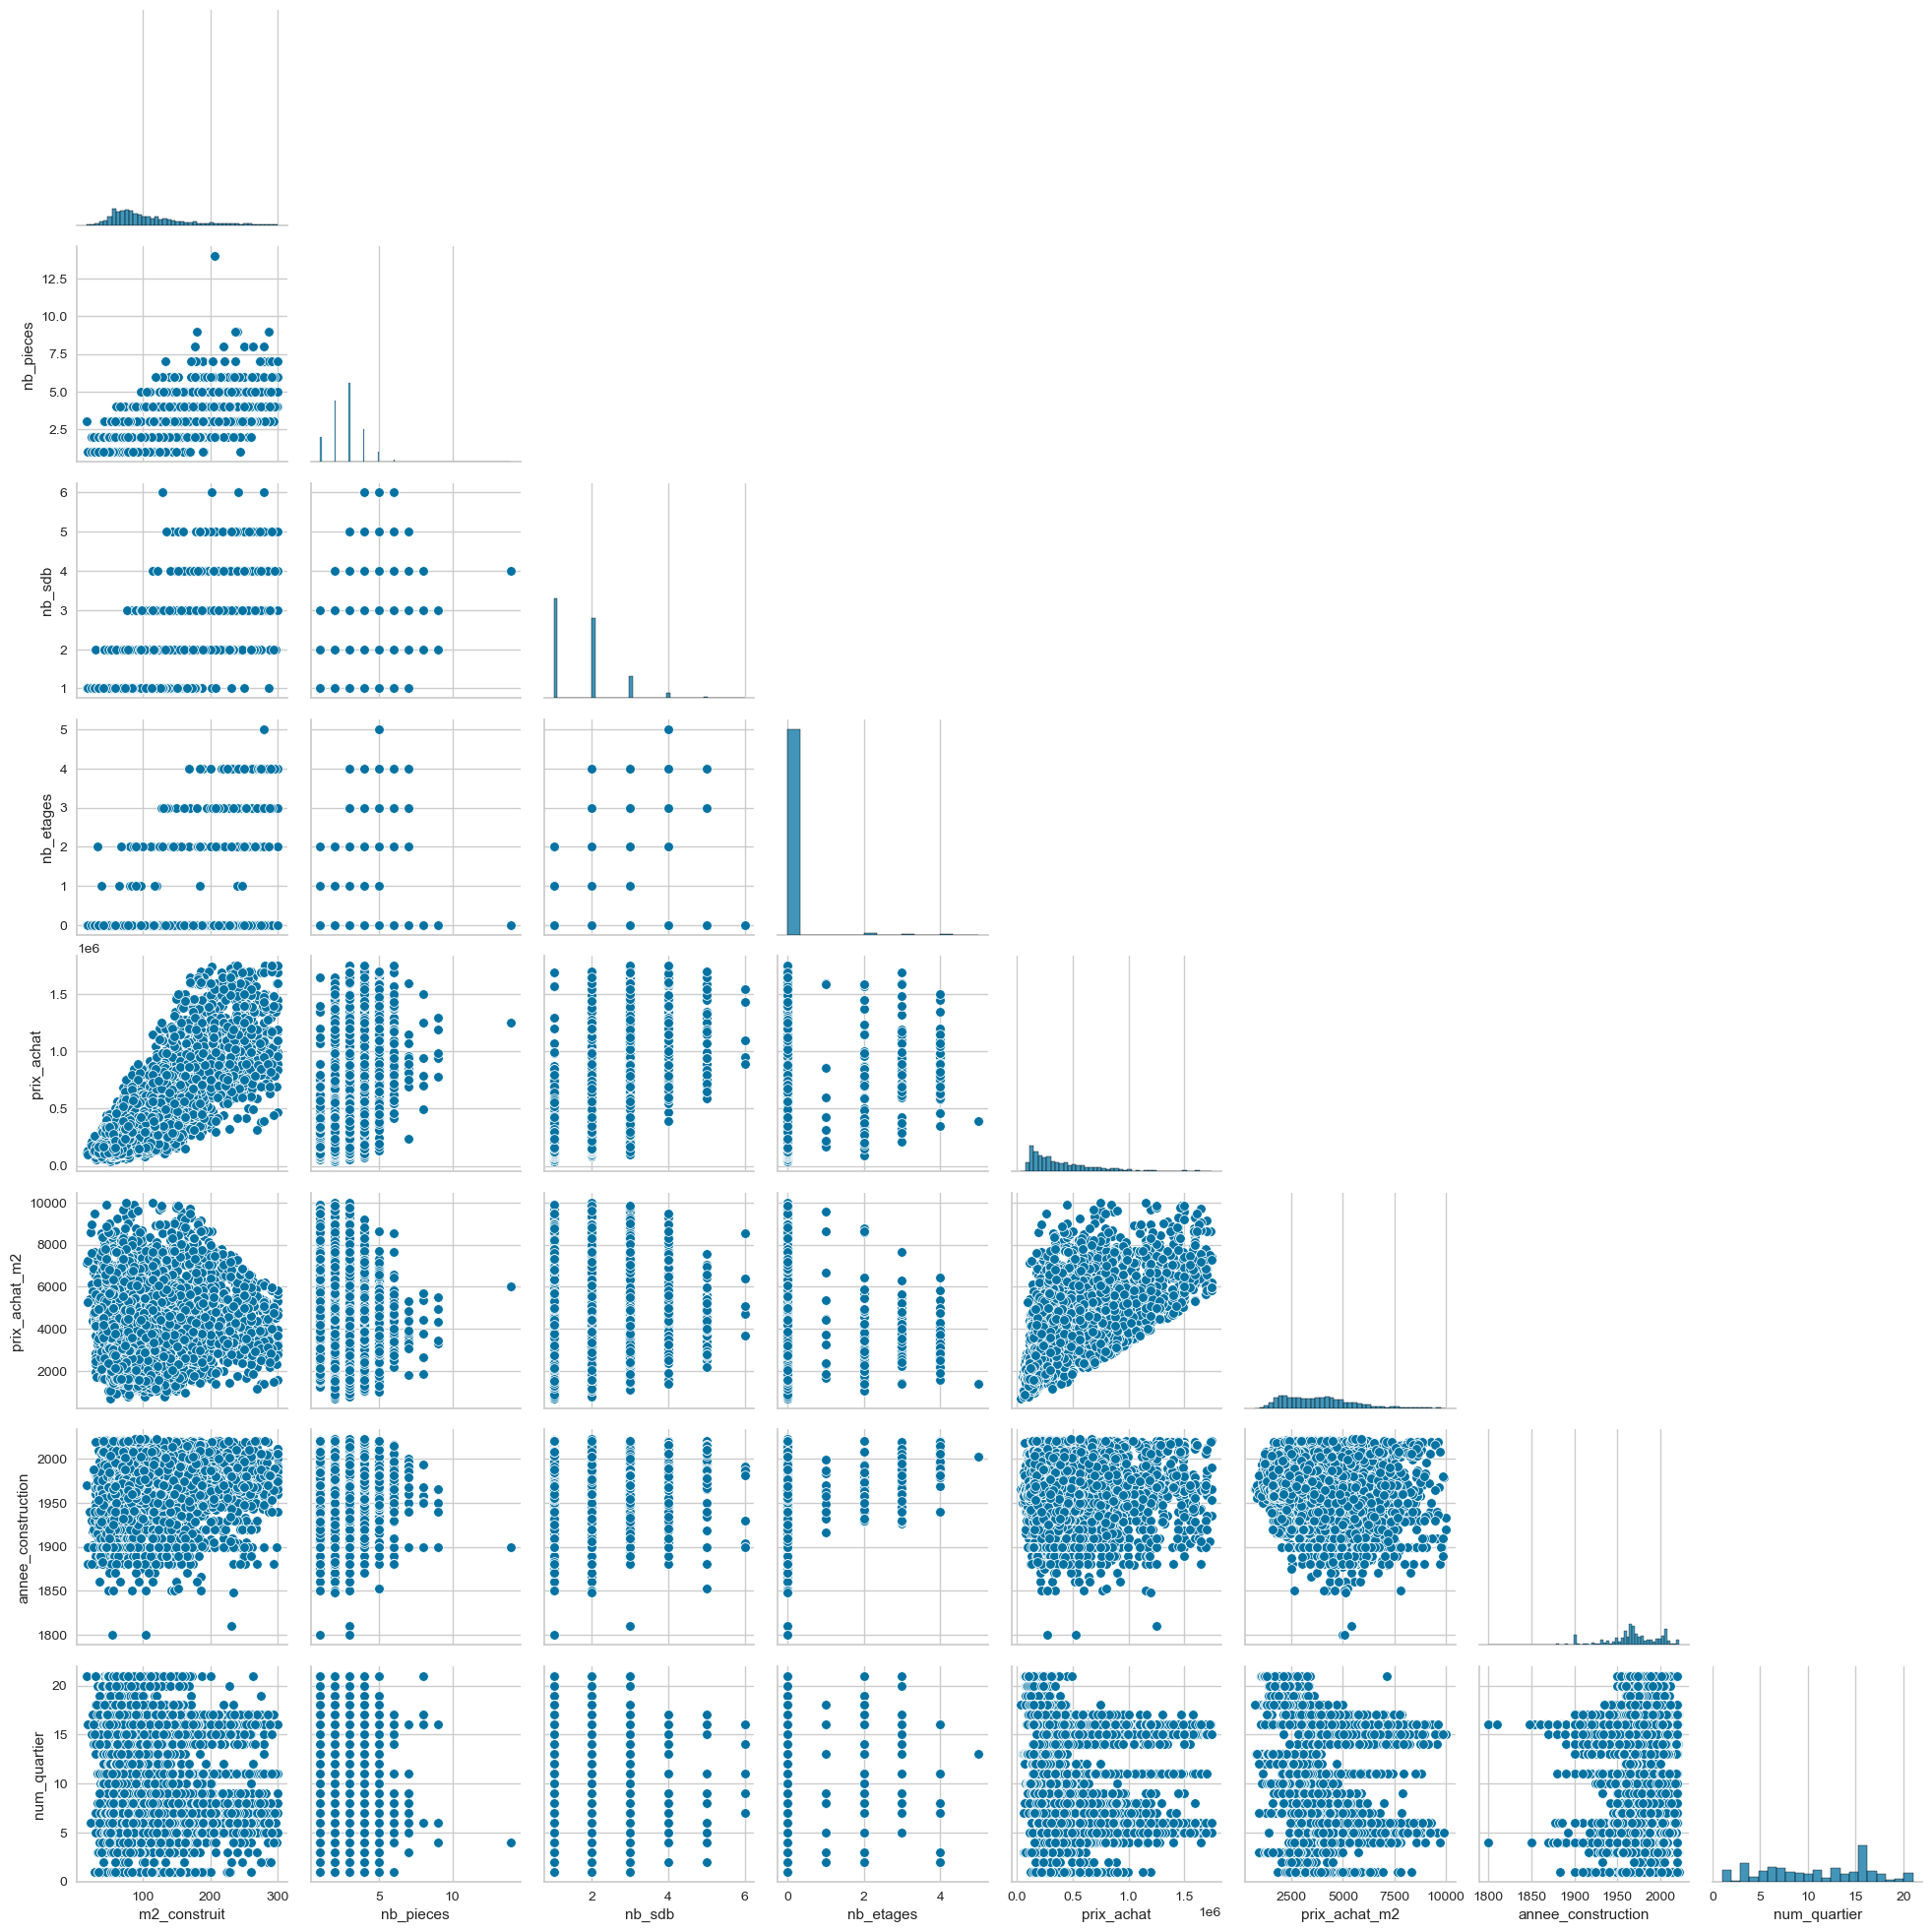

In [78]:
import seaborn as sns
sns.pairplot(data=df_annee.select_dtypes(exclude='bool'),corner=True)

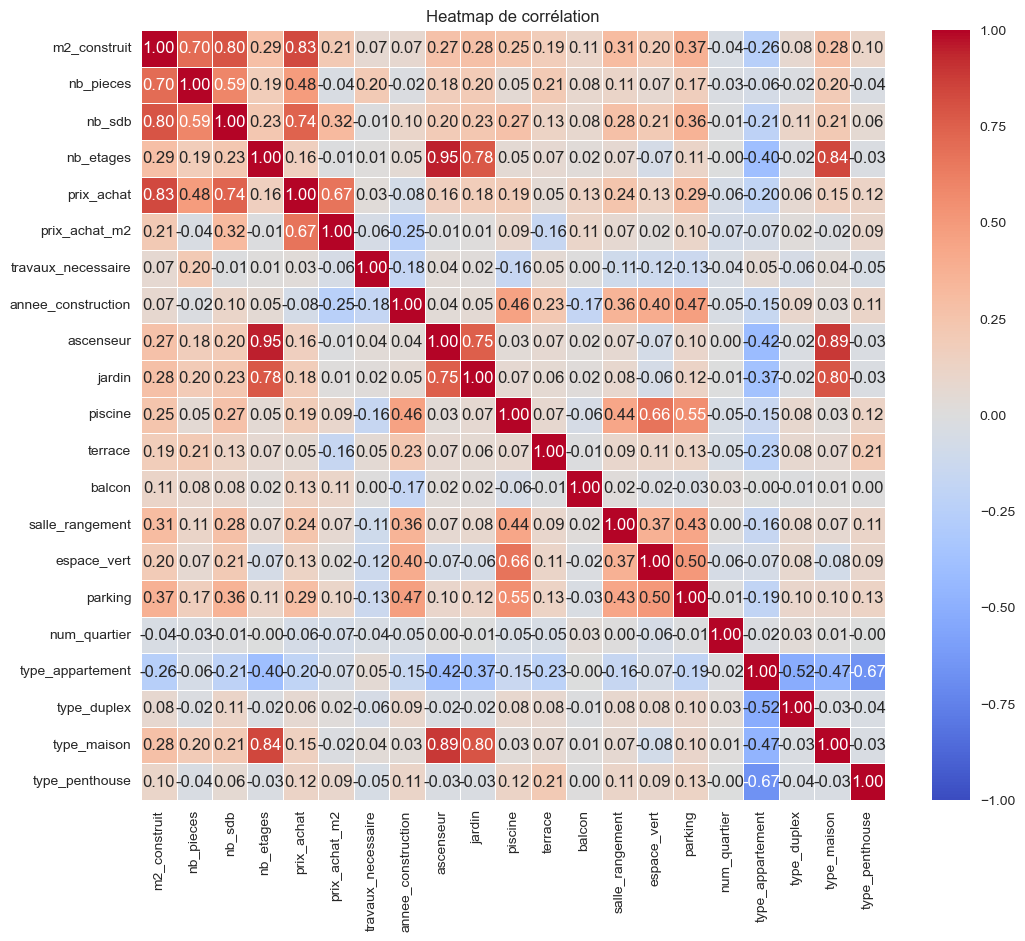

In [79]:
import seaborn as sns

# Calculez la matrice de corrélation
corr_matrix = df_annee.iloc[:,:-1].corr()

# Tracez la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin=-1,vmax=1)
plt.title('Heatmap de corrélation')
plt.show()


Je commence par un modèle de régression linéaire simple que j'utiliserai comme baseline pour comparer les scores avec les autres modèles.  
La matrice de corrélation indique que la variable m2_construit est la variable la plus corrélée à la target 'prix_achat'.

## Régression simple avec la feature 'm2_construit'

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import RobustScaler

# Création de données fictives
X = df_annee['m2_construit'].values.reshape(-1, 1)
y = df_annee['prix_achat']

# Division des données en ensembles d'entraînement et de test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_reg = RobustScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)

X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Création de l'objet de régression linéaire
regression = LinearRegression()

# Ajustement du modèle aux données d'entraînement
regression.fit(X_train_reg_scaled, y_train_reg)

# Prédiction sur les données de test
y_pred_reg = regression.predict(X_test_reg_scaled)

# Calcul de l'erreur quadratique moyenne
r2_train = regression.score(X_train_reg_scaled, y_train_reg)
r2_predict = regression.score(X_test_reg_scaled, y_test_reg)

print('R² train :', r2_train)
print('R² predict:', r2_predict)

# Calcul du Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("MAE:", mae)

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("MSE:", mse)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R² train : 0.6879299098226239
R² predict: 0.6782874112897056
MAE: 133379.88191175667
MSE: 35575530966.73877
RMSE: 188614.76868670378


La regréssion linéaire affiche un score de prédiction de 0.67.  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


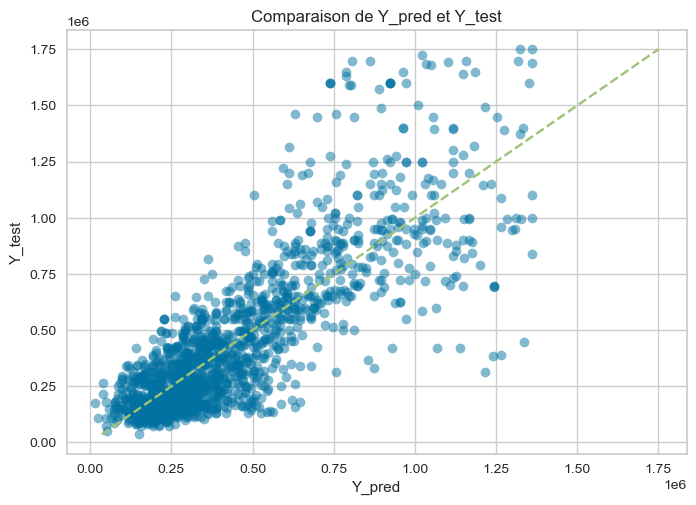

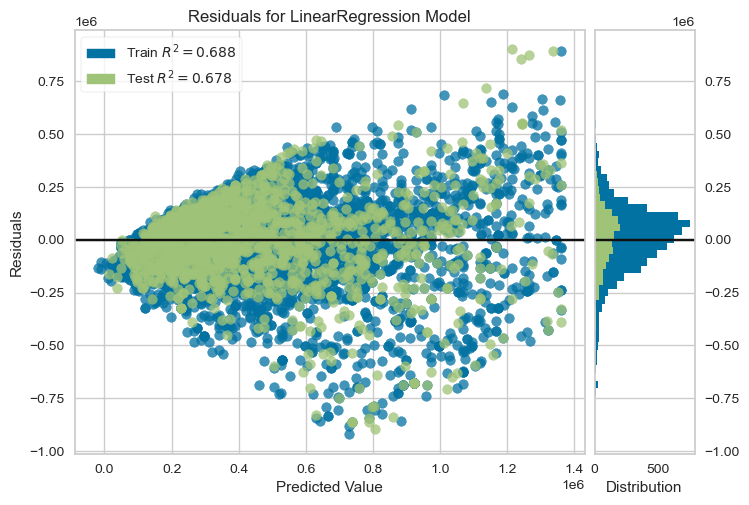

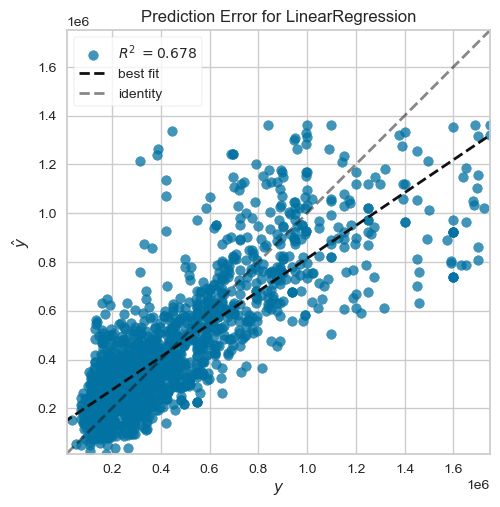

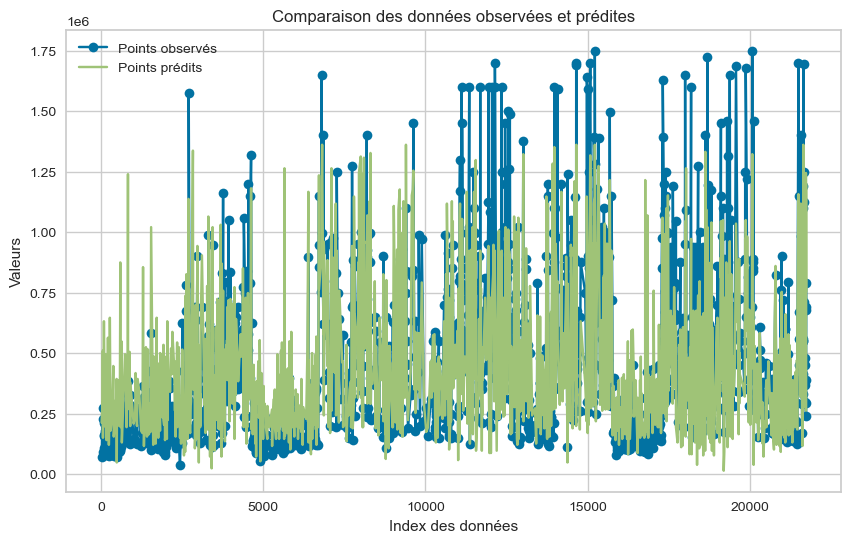

In [81]:
from yellowbrick.model_selection import learning_curve
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Affichage des résultats de la régression polynomiale
plt.plot(y_pred_reg, y_test_reg, 'o', alpha=0.5)
min_true = y_test_reg.min()
max_true = y_test_reg.max()
plt.plot([min_true, max_true], [min_true, max_true], '--') 
plt.title('Comparaison de Y_pred et Y_test')
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.legend()
plt.show()

# Visualisation des résidus
visualizer = ResidualsPlot(regression)
visualizer.fit(X_train_reg_scaled, y_train_reg)  # Adapter les données d'entraînement au visualiseur
visualizer.score(X_test_reg_scaled, y_test_reg)  # Évaluer le modèle sur les données de test
visualizer.show()                     # Finaliser et afficher la figure

# Visualisation de l'erreur de prédiction
visualizer = PredictionError(regression)
visualizer.fit(X_train_reg_scaled, y_train_reg)
visualizer.score(X_test_reg_scaled, y_test_reg)
visualizer.show()


# Créer un DataFrame avec les points observés et les points prédits
donnees_comparatives_reg = pd.DataFrame({'points_observés': y_test_reg, 'points_predits': y_pred_reg})

# Trier les données par index si nécessaire
donnees_comparatives_reg = donnees_comparatives_reg.sort_index()

# Tracer les données observées et prédites
plt.figure(figsize=(10, 6))
plt.plot(donnees_comparatives_reg.index, donnees_comparatives_reg['points_observés'], label='Points observés', marker='o')
plt.plot(donnees_comparatives_reg.index, donnees_comparatives_reg['points_predits'], label='Points prédits', marker='x')
plt.xlabel('Index des données')
plt.ylabel('Valeurs')
plt.title('Comparaison des données observées et prédites')
plt.legend()
plt.grid(True)
plt.show()



## Modèle ElasticNetCV 

In [82]:
# Données et cible
data_en = df_annee.drop(['prix_achat','nom_quartier'], axis=1)
target_en = df_annee['prix_achat']

# Division des données en ensembles d'entraînement et de test
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(data_en, target_en, test_size=0.2, random_state=42)

scaler_en = RobustScaler()

X_train_en_scaled = scaler_en.fit_transform(X_train_en)
X_test_en_scaled = scaler_en.transform(X_test_en)


# Modèle ElasticNetCV
model_en = ElasticNetCV(cv=5, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
                        max_iter=10000)

model_en.fit(X_train_en_scaled, y_train_en)

# Prédictions sur les ensembles d'entraînement et de test
pred_train_en = model_en.predict(X_train_en_scaled)
pred_test_en = model_en.predict(X_test_en_scaled)

# Calcul des métriques
mae_test = mean_absolute_error(y_test_en, pred_test_en)
mse_test = mean_squared_error(y_test_en, pred_test_en)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train_en, pred_train_en)
r2_test = r2_score(y_test_en, pred_test_en)

print("R2 train:", r2_train)
print("R2 test:", r2_test)
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68562797517.25781, tolerance: 56372342572.161026
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76813515938.54297, tolerance: 56273711614.59574
  model = cd_fast.enet_coordinate_descent_gram(


R2 train: 0.9409669780575582
R2 test: 0.9368374507771482
MAE: 54075.348387545615
MSE: 6984623246.556295
RMSE: 83574.05845450067


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


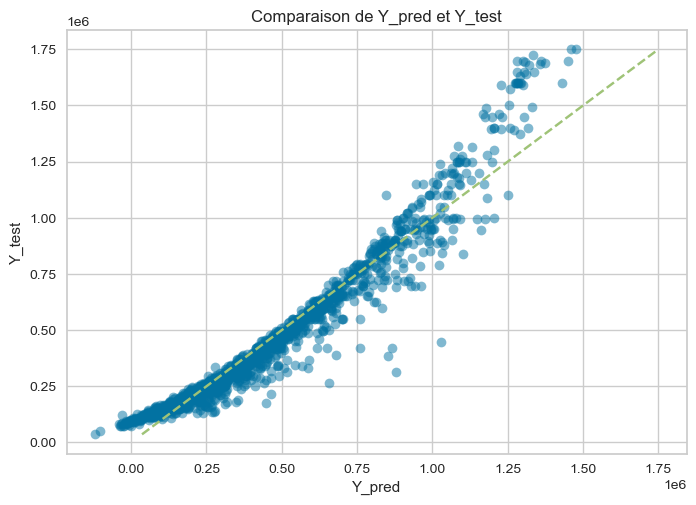

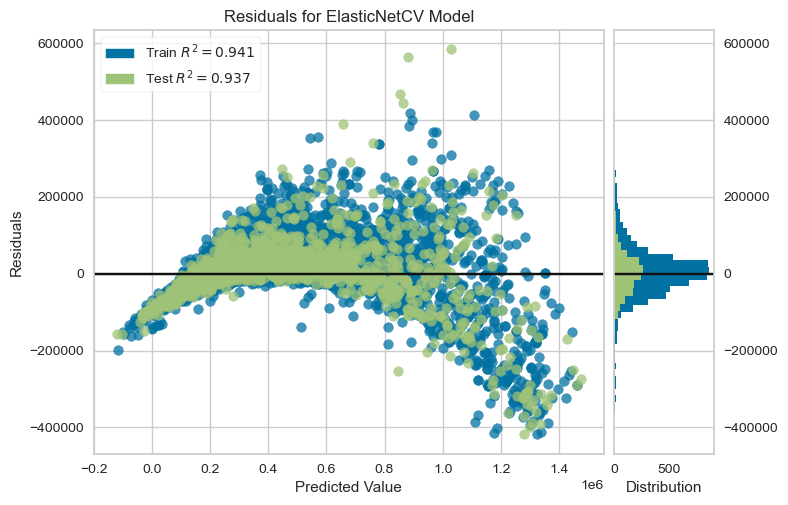

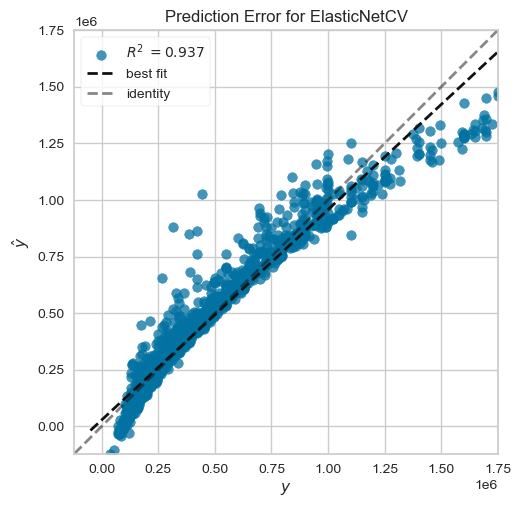

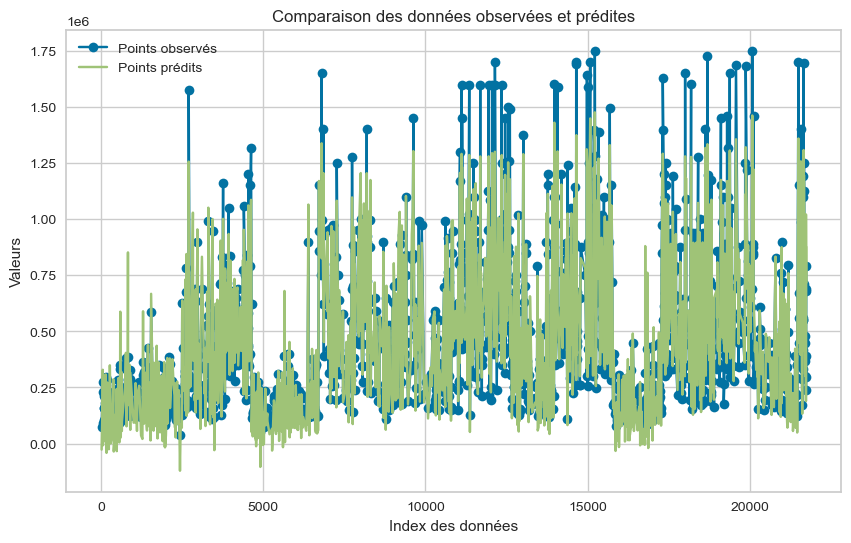

In [83]:
from yellowbrick.model_selection import learning_curve
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Affichage des résultats de la régression polynomiale
plt.plot(pred_test_en, y_test_en, 'o', alpha=0.5)
min_true = y_test_en.min()
max_true = y_test_en.max()
plt.plot([min_true, max_true], [min_true, max_true], '--') 
plt.title('Comparaison de Y_pred et Y_test')
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.legend()
plt.show()

# Visualisation des résidus
visualizer = ResidualsPlot(model_en)
visualizer.fit(X_train_en_scaled, y_train_en)  # Adapter les données d'entraînement au visualiseur
visualizer.score(X_test_en_scaled, y_test_en)  # Évaluer le modèle sur les données de test
visualizer.show()                     # Finaliser et afficher la figure

# Visualisation de l'erreur de prédiction
visualizer = PredictionError(model_en)
visualizer.fit(X_train_en_scaled, y_train_en)
visualizer.score(X_test_en_scaled, y_test_en)
visualizer.show()


# Créer un DataFrame avec les points observés et les points prédits
donnees_comparatives_model_en = pd.DataFrame({'points_observés': y_test_en, 'points_predits': pred_test_en})

# Trier les données par index si nécessaire
donnees_comparatives_model_en = donnees_comparatives_model_en.sort_index()

# Tracer les données observées et prédites
plt.figure(figsize=(10, 6))
plt.plot(donnees_comparatives_model_en.index, donnees_comparatives_model_en['points_observés'], label='Points observés', marker='o')
plt.plot(donnees_comparatives_model_en.index, donnees_comparatives_model_en['points_predits'], label='Points prédits', marker='x')
plt.xlabel('Index des données')
plt.ylabel('Valeurs')
plt.title('Comparaison des données observées et prédites')
plt.legend()
plt.grid(True)
plt.show()



In [84]:
pd.DataFrame({'points_observés': y_test_en, 'points_predits' : np.round(pred_test_en)}, 
             index=X_test_en.index)

points_observés  points_predits
95              159900        156559.0
13753           165000        142780.0
15932           145000        110266.0
2462            140000         86349.0
4782            112700         46750.0
...                ...             ...
2658            259000        268450.0
808             191000        169140.0
12876           125900         53600.0
12017           195000        228275.0
13438           175000        139660.0

[1681 rows x 2 columns]

Ce deuxième modèle obtient un meilleur score que la régression linéaire simple mais il affiche un RMSE à 70869 ce qui représente une marge d'erreur trop grande pour que le modèle soit efficace.  
Je vais reprendre le modèle mais en vérifiant au préalable si les variables explicatives sont en multicollinéarité avec le calcul du VIF. 

In [85]:
# Liste des noms des colonnes booléennes
colonnes_bool = X_train_en.select_dtypes(include='bool')

# Boucle sur chaque colonne booléenne et les convertir en entiers
for col in colonnes_bool:
    X_train_en[col] = X_train_en[col].astype(int)


In [86]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_columns = ['m2_construit', 'nb_pieces', 'nb_sdb', 'nb_etages', 'prix_achat_m2',
       'travaux_necessaire', 'annee_construction', 'ascenseur', 'jardin',
       'piscine', 'terrace', 'balcon', 'salle_rangement', 'espace_vert',
       'parking', 'num_quartier', 'type_appartement', 'type_duplex',
       'type_maison', 'type_penthouse']
# Calcul du VIF pour les variables numériques
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns
vif_data["VIF"] = [variance_inflation_factor(X_train_en[numeric_columns].values, i) for i in range(len(numeric_columns))]

print('VIF (facteur d\'inflation de la variance) pour les variables numériques :')
print(vif_data)

VIF (facteur d'inflation de la variance) pour les variables numériques :
               feature          VIF
0         m2_construit     4.009041
1            nb_pieces     2.444427
2               nb_sdb     3.146517
3            nb_etages    11.033599
4        prix_achat_m2     1.475572
5   travaux_necessaire     1.117795
6   annee_construction     1.787143
7            ascenseur    13.879665
8               jardin     3.072741
9              piscine     2.217910
10             terrace     1.200132
11              balcon     1.060822
12     salle_rangement     1.433628
13         espace_vert     1.972556
14             parking     1.888726
15        num_quartier     1.031093
16    type_appartement  6604.330875
17         type_duplex   218.056171
18         type_maison   179.640427
19      type_penthouse   349.033666


Une valeur supérieure à 10 indique multicolinéarité des variables.  


In [87]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_columns = ['m2_construit','nb_etages', 'prix_achat_m2', 'travaux_necessaire',
 'jardin', 'piscine','terrace','balcon','salle_rangement','espace_vert','parking','num_quartier',
 'type_duplex', 'type_maison', 'type_penthouse']


vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns
vif_data["VIF"] = [variance_inflation_factor(X_train_en[numeric_columns].values, i) for i in range(len(numeric_columns))]

print('VIF (facteur d\'inflation de la variance) pour les variables numériques :')
print(vif_data)

VIF (facteur d'inflation de la variance) pour les variables numériques :
               feature       VIF
0         m2_construit  6.348164
1            nb_etages  4.072071
2        prix_achat_m2  4.714957
3   travaux_necessaire  1.312978
4               jardin  2.992320
5              piscine  2.601491
6              terrace  1.826069
7               balcon  1.241632
8      salle_rangement  2.047915
9          espace_vert  2.485304
10             parking  2.460440
11        num_quartier  3.198559
12         type_duplex  1.060570
13         type_maison  4.084587
14      type_penthouse  1.138394


Les variables explicatives ne sont plus en multicolinéarités, je peux à présent tester à nouveau le modèle ElasticNetCV.

In [88]:
vif_data_list =vif_data.feature.to_list()

In [89]:
Xs = df_annee[vif_data_list]
ys = df_annee['prix_achat']

# Division des données en ensembles d'entraînement, de validation et de test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, ys, test_size=0.2)
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_s, y_train_s, test_size=0.2)

scaler_s = RobustScaler()
X_train_s_scaled = scaler_s.fit_transform(X_train_s)
X_val_s_scaled = scaler_s.transform(X_val_s)
X_test_s_scaled = scaler_s.transform(X_test_s)
# Entraînement du modèle ElasticNet avec les données
model_en_s = ElasticNetCV(
    cv=5, 
    l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
    alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
    max_iter=10000
)
model_en_s.fit(X_train_s_scaled, y_train_s)

# Validation croisée
cv_scores = cross_val_score(model_en_s, X_train_s_scaled, y_train_s, cv=3, verbose=2)

# Prédiction sur les données d'entraînement, de validation et de test
pred_train_s = model_en_s.predict(X_train_s_scaled)
pred_val_s = model_en_s.predict(X_val_s_scaled)
pred_test_s = model_en_s.predict(X_test_s_scaled)

# Calcul de l'erreur quadratique moyenne
r2_train = model_en_s.score(X_train_s_scaled, y_train_s)
r2_predict = model_en_s.score(X_test_s_scaled, y_test_s)
MAE = mean_absolute_error(y_test_s, pred_test_s)
MSE = mean_squared_error(y_test_s, pred_test_s)
RMSE = np.sqrt(mean_squared_error(y_test_s, pred_test_s))

print('R² train :', r2_train)
print('R² predict:', r2_predict)
print('MAE :', MAE)
print('MSE :', MSE)
print('RMSE :', RMSE)
print('Validation croisée scores :', cv_scores)


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
R² train : 0.940880640361624
R² predict: 0.935627832894128
MAE : 54175.74719859091
MSE : 6839234698.335473
RMSE : 82699.66564826893
Validation croisée scores : [0.93645156 0.94121575 0.94232129]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


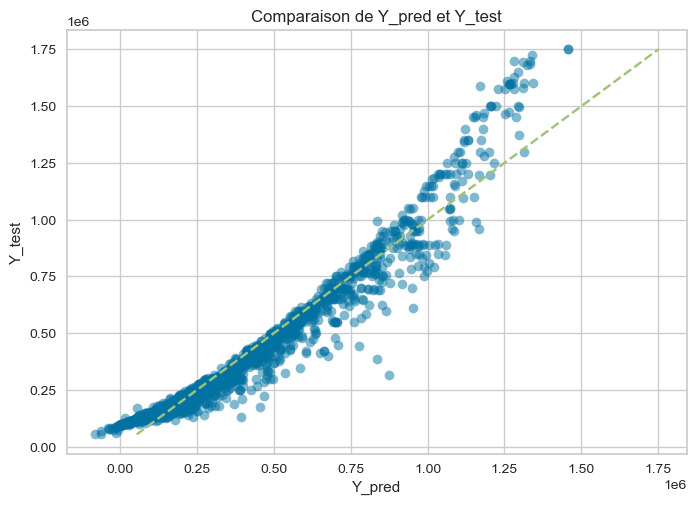

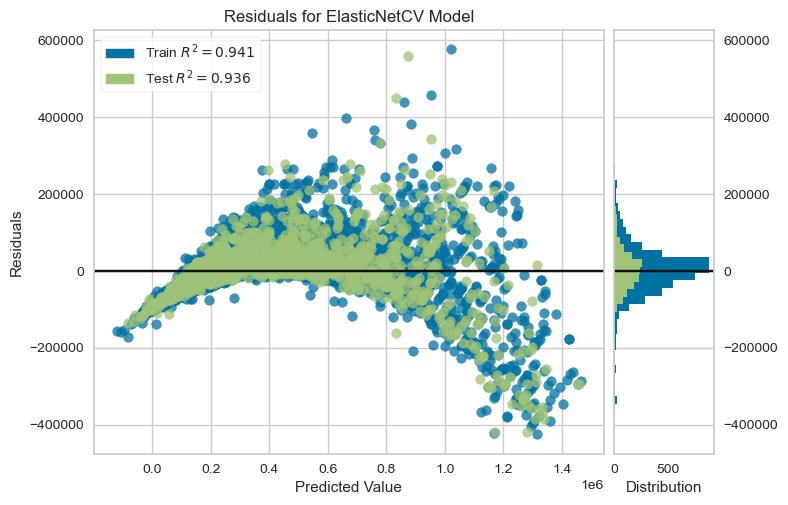

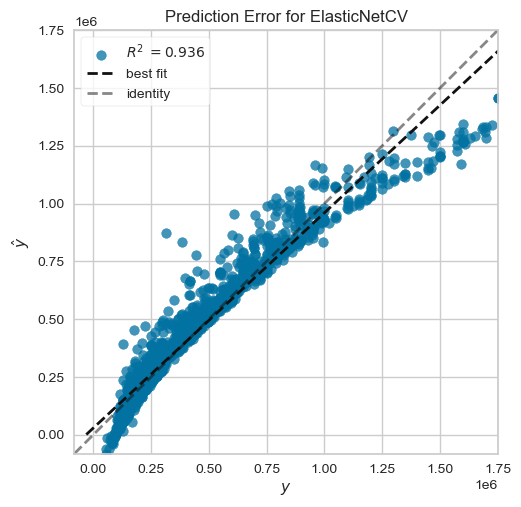

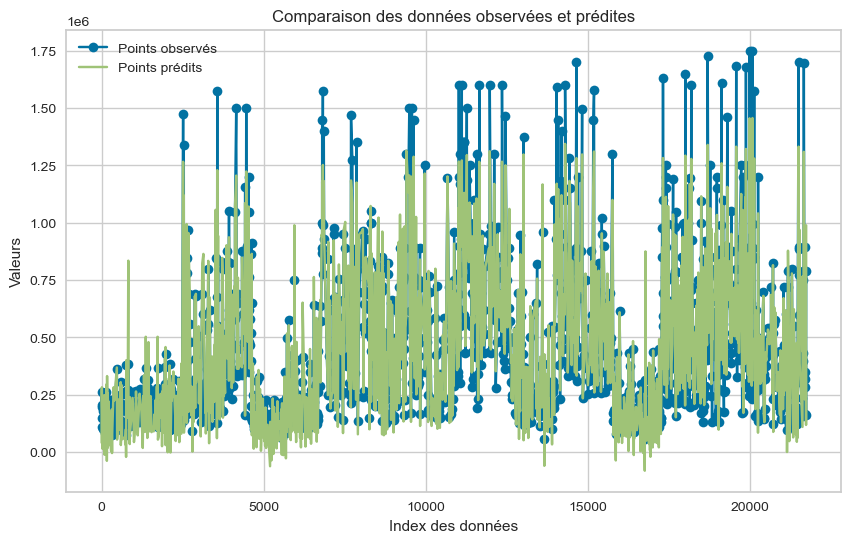

In [90]:
plt.plot(pred_test_s, y_test_s, 'o', alpha=0.5)
min_true = y_test_s.min()
max_true = y_test_s.max()
plt.plot([min_true, max_true], [min_true, max_true], '--') 
plt.title('Comparaison de Y_pred et Y_test')
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.legend()
plt.show()

# Visualisation des résidus
visualizer = ResidualsPlot(model_en_s)
visualizer.fit(X_train_s_scaled, y_train_s)  # Adapter les données d'entraînement au visualiseur
visualizer.score(X_test_s_scaled, y_test_s)  # Évaluer le modèle sur les données de test
visualizer.show()                     # Finaliser et afficher la figure

# Visualisation de l'erreur de prédiction
visualizer = PredictionError(model_en_s)
visualizer.fit(X_train_s_scaled, y_train_s)
visualizer.score(X_test_s_scaled, y_test_s)
visualizer.show()

# Créer un DataFrame avec les points observés et les points prédits
donnees_comparatives_model_s = pd.DataFrame({'points_observés': y_test_s, 'points_predits': pred_test_s})

# Trier les données par index si nécessaire
donnees_comparatives_model_s = donnees_comparatives_model_s.sort_index()

# Tracer les données observées et prédites
plt.figure(figsize=(10, 6))
plt.plot(donnees_comparatives_model_s.index, donnees_comparatives_model_s['points_observés'], label='Points observés', marker='o')
plt.plot(donnees_comparatives_model_s.index, donnees_comparatives_model_s['points_predits'], label='Points prédits', marker='x')
plt.xlabel('Index des données')
plt.ylabel('Valeurs')
plt.title('Comparaison des données observées et prédites')
plt.legend()
plt.grid(True)
plt.show()



Malgré des variables qui ne son pas multicolinéaires, le modèle n'a pas de meilleures performances que le précédent.  
Je vais à présent tester la régression polynomiale.

# Regression polynomiale à 2°

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Sélection des variables explicatives et de la variable cible
Xs_2 = df_annee[vif_data_list]
ys_2 = df_annee['prix_achat']

# Division des données en ensembles d'entraînement, de validation et de test
X_train_2,  X_test_2 , y_train_2,  y_test_2 = train_test_split(Xs_2, ys_2, test_size=0.2)
X_train_2 , X_val_2,  y_train_2,  y_val_2= train_test_split(X_train_2 , y_train_2 , test_size=0.2)

# Transformation polynomiale des features
degree = 2  # Degré du polynôme
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_2)
X_val_poly = poly.transform(X_val_2)
X_test_poly = poly.transform(X_test_2)

scaler_poly = RobustScaler()

X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_val_poly_scaled = scaler_poly.transform(X_val_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)


# Entraînement du modèle ElasticNet avec les données transformées
model_en_2= ElasticNetCV(
    cv=5, 
    l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
    alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
    max_iter=10000
)
model_en_2.fit(X_train_poly_scaled, y_train_2)

# Validation croisée
cv_scores = cross_val_score(model_en_2 , X_train_poly_scaled, y_train_2 , cv=3, verbose=2)

# Prédiction sur les données d'entraînement, de validation et de test
pred_train_2= model_en_2.predict(X_train_poly_scaled)
pred_val_2= model_en_2.predict(X_val_poly_scaled)
pred_test_2= model_en_2.predict(X_test_poly_scaled)

# Calcul de l'erreur quadratique moyenne
r2_train = model_en_2.score(X_train_poly_scaled, y_train_2)
r2_predict = model_en_2.score(X_test_poly_scaled, y_test_2)
MAE = mean_absolute_error(y_test_2 , pred_test_2)
MSE = mean_squared_error(y_test_2 , pred_test_2)
RMSE = np.sqrt(mean_squared_error(y_test_2,  pred_test_2))

print('R² train :', r2_train)
print('R² predict:', r2_predict)
print('MAE :', MAE)
print('MSE :', MSE)
print('RMSE :', RMSE)
print('Validation croisée scores :', cv_scores)

/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92467151362.19373, tolerance: 46246988063.94365
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93417964051.93954, tolerance: 47460383511.35898
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93199181178.5866, tolerance: 46056201043.345924
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.

/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55074630057.61867, tolerance: 30870010171.514095
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55081887842.00173, tolerance: 31976155720.376163
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55022727219.02792, tolerance: 31872520779.336388
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/pytho

[CV] END .................................................... total time=  10.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62230618214.05606, tolerance: 29001209404.462425
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61124039958.6529, tolerance: 30550907198.14554
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61029634872.498474, tolerance: 31058163771.68188
  model = 

[CV] END .................................................... total time=  12.0s


/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62646668229.043434, tolerance: 31184636338.293633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61319098463.35913, tolerance: 32683060390.398808
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62919657209.8434, tolerance: 32339365581.452957
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sarah.harouni/anaconda3/lib/pytho

[CV] END .................................................... total time=  10.7s
R² train : 0.9999965263388797
R² predict: 0.9999979180354613
MAE : 76.21170972324262
MSE : 212444.11444190887
RMSE : 460.9166024802197
Validation croisée scores : [0.99998967 0.99999954 0.99999957]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.0s finished


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


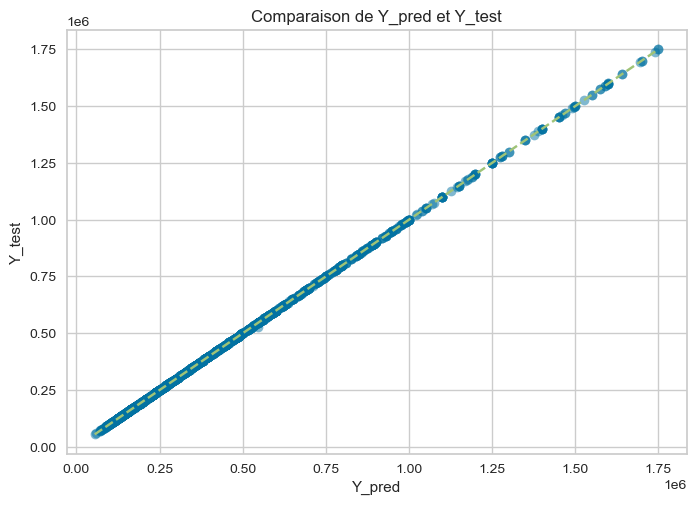

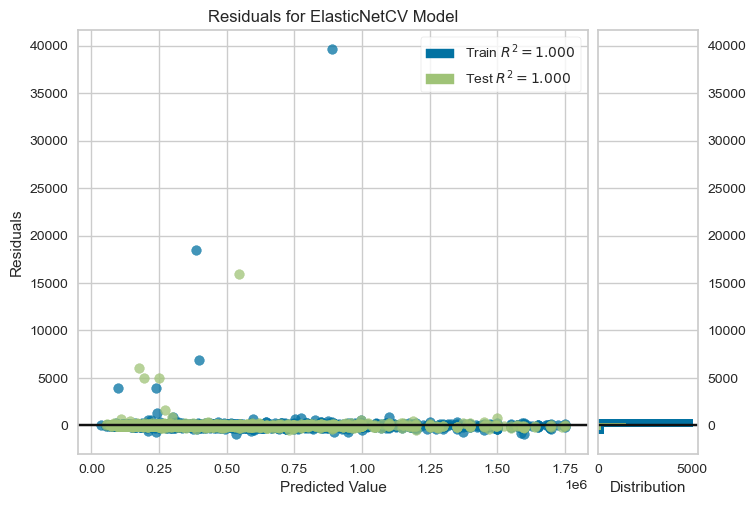

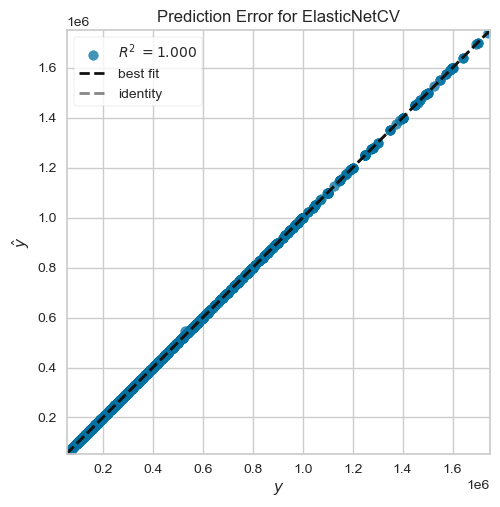

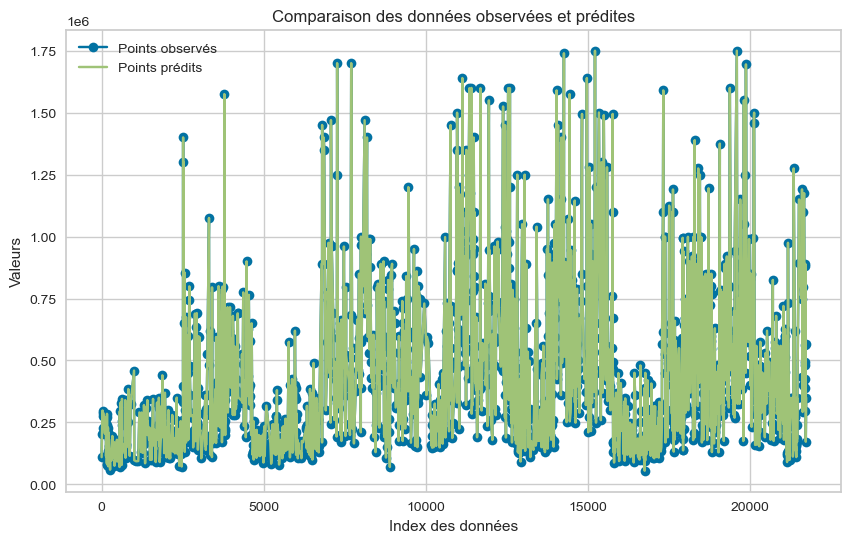

In [92]:
from yellowbrick.model_selection import learning_curve
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Affichage des résultats de la régression polynomiale
plt.plot(pred_test_2, y_test_2, 'o', alpha=0.5)
min_true = y_test_2.min()
max_true = y_test_2.max()
plt.plot([min_true, max_true], [min_true, max_true], '--') 
plt.title('Comparaison de Y_pred et Y_test')
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.legend()
plt.show()

# Visualisation des résidus
visualizer = ResidualsPlot(model_en_2)
visualizer.fit(X_train_poly_scaled, y_train_2)  # Adapter les données d'entraînement au visualiseur
visualizer.score(X_test_poly_scaled, y_test_2)  # Évaluer le modèle sur les données de test
visualizer.show()                     # Finaliser et afficher la figure

# Visualisation de l'erreur de prédiction
visualizer = PredictionError(model_en_2)
visualizer.fit(X_train_poly_scaled, y_train_2)
visualizer.score(X_test_poly_scaled, y_test_2)
visualizer.show()


# Créer un DataFrame avec les points observés et les points prédits
donnees_comparatives_model_en_2 = pd.DataFrame({'points_observés': y_test_2, 'points_predits': pred_test_2})

# Trier les données par index si nécessaire
donnees_comparatives_model_en_2 = donnees_comparatives_model_en_2.sort_index()

# Tracer les données observées et prédites
plt.figure(figsize=(10, 6))
plt.plot(donnees_comparatives_model_en_2.index, donnees_comparatives_model_en_2['points_observés'], label='Points observés', marker='o')
plt.plot(donnees_comparatives_model_en_2.index, donnees_comparatives_model_en_2['points_predits'], label='Points prédits', marker='x')
plt.xlabel('Index des données')
plt.ylabel('Valeurs')
plt.title('Comparaison des données observées et prédites')
plt.legend()
plt.grid(True)
plt.show()



Le modèle affiche un score très performant avec un RMSE de 629.

## Evaluation des modèles

Je vais d'abord choisir une ligne de mes données et la soumettre à nos différents modèles.

In [109]:
X_train_en.loc[(X_train_en['m2_construit']==104)&(X_train_en['prix_achat_m2']==4212),:]

m2_construit  nb_pieces  nb_sdb  nb_etages  prix_achat_m2  \
21701           104          2       2          0           4212   

       travaux_necessaire  annee_construction  ascenseur  jardin  piscine  \
21701                   0              2008.0          0       0        1   

       terrace  balcon  salle_rangement  espace_vert  parking  num_quartier  \
21701        0       0                1            0        0             1   

       type_appartement  type_duplex  type_maison  type_penthouse  
21701                 1            0            0               0

In [110]:
dico_test_modele = {'m2_construit':104,
                    'nb_pieces':2, 
                    'nb_sdb':2,
                    'nb_etages':0,
                    'prix_achat_m2': 4212,
                    'travaux_necessaire': False, 
                    'annee_construction':2008,
                    'ascenseur': False,
                    'jardin': False,
                    'piscine': True,
                    'terrace': False,
                    'balcon': False, 
                    'salle_rangement': True,
                    'espace_vert': False, 
                    'parking': False,
                    'num_quartier':1,
                    'type_appartement':True, 
                    'type_duplex': False, 
                    'type_maison': False,
                    'type_penthouse': False}
prix_achat = 438000

In [111]:
row_test = pd.DataFrame.from_dict(dico_test_modele,orient='index').T

In [112]:
row_test

m2_construit nb_pieces nb_sdb nb_etages prix_achat_m2 travaux_necessaire  \
0          104         2      2         0          4212              False   

  annee_construction ascenseur jardin piscine terrace balcon salle_rangement  \
0               2008     False  False    True   False  False            True   

  espace_vert parking num_quartier type_appartement type_duplex type_maison  \
0       False   False            1             True       False       False   

  type_penthouse  
0          False

In [118]:
# simple regression
##regression.predict(104)

#modele elasticnetcv saganne
##model_en

#modele elasticnetcv avec vif
##model_en_s

#modele polynomiale à 2°
##poly
##model_en_2


In [114]:
# Test pour la regression logistique simple
nouvelle_observation = [[104]]
nouvelle_observation_scaled = scaler_reg.transform(nouvelle_observation)
prediction = regression.predict(nouvelle_observation_scaled)
print("Prédiction:", prediction)


Prédiction: [407961.49141967]


In [117]:
# Test pour la regression ElasticNetCV Version 1
test_en = np.array(row_test)
test_scaled = scaler_en.transform(test_en)
prediction_en = model_en.predict(test_scaled)
print("Prédiction:", prediction_en)


Prédiction: [463628.44730767]


/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [122]:
# Test pour la regression ElasticNetCV version 2
test_en_s = np.array(row_test[X_train_s.columns])
test_scaled_en_s = scaler_s.transform(test_en_s)
prediction_en_s = model_en_s.predict(test_scaled_en_s)
print("Prédiction:", prediction_en_s)


Prédiction: [451927.49908757]


/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [124]:
# Test pour la regression polynomiale à 2°
test_poly = np.array(row_test[X_train_2.columns])
test_poly = poly.transform(test_poly)
test_scaled_poly = scaler_poly.transform(test_poly)
prediction_poly = model_en_2.predict(test_scaled_poly)
print("Prédiction:", prediction_poly)


Prédiction: [438252.98156053]


/Users/sarah.harouni/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Enregistrer le modèle dans un fichier
filename = 'poly.pkl'
pickle.dump(poly, open(filename, 'wb'))

# Enregistrer le modèle dans un fichier
filename = 'model_en_2.pkl'
pickle.dump(model_en_2, open(filename, 'wb'))



In [ ]:
data.head()

In [ ]:
data.to_csv('data_clean.csv')

In [ ]:
data

In [ ]:
visu = pd.read_csv('visuel.csv',index_col=0)

In [ ]:
visu.tail()

In [ ]:
visu.iloc[-25]